# **ADM Homework 2 - Group#23**

#### *Some useful command lines to get the datasets and do basic manipulations*

In [ ]:
!wget 'https://adm2022.s3.amazonaws.com/instagram_posts.zip'

!wget 'https://adm2022.s3.amazonaws.com/instagram_locations.zip'

!wget 'https://adm2022.s3.amazonaws.com/instagram_profiles.zip'

!unzip 'instagram_posts.zip'
!del 'https://adm2022.s3.amazonaws.com/instagram_posts.zip'


!cut -f 3,7 'instagram_posts.csv' > 'posts_type.csv'
!cut -f 3,6 'instagram_posts.csv' > 'posts_dates.csv' 

!cut -f 1,2,3,4,5,6,7,9,10 'instagram_posts.csv' > 'posts.csv'   #CUTTING 'DESCRIBE' COLUMN

#### *Import libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sbo

from tqdm import tqdm
from datetime import time

# **Research Question 1 - Exploratory Data Analysis (EDA)**

We committed resources on exploratory data analysis about *profiles* and *locations* datasets. Our analysis consisted of opening the datasets, cleaning the data understanding the various types of information involved, and providing all statistical summaries about every involved parameter. We completed our EDA with some charts, that give an instant glimpse of what we are dealing with. 

In [69]:
profiles = pd.read_csv('~/instagram_profiles.zip', delimiter='\t')

In [4]:
profiles.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [5]:
profiles.describe()

,sid,profile_id,following,followers,n_posts
count,4.509586e+06,4.477139e+06,3.452771e+06,3.452771e+06,3.452771e+06
mean,2.255992e+06,3.083302e+09,1.405641e+03,4.739899e+03,4.095414e+02
std,1.301807e+06,4.266575e+10,8.113473e+03,1.939087e+05,1.041940e+03
min,1.186000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128596e+06,2.735177e+08,3.560000e+02,1.590000e+02,2.200000e+01
50%,2.255992e+06,1.649248e+09,7.540000e+02,4.060000e+02,1.200000e+02
75%,3.383389e+06,5.514691e+09,1.573000e+03,9.740000e+02,4.200000e+02
max,4.510785e+06,9.001013e+13,4.191080e+06,2.854576e+08,1.837300e+05


In [6]:
profiles.info()
#This view is crucial to set a proper data cleaning process

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


Up to this point, we can make the following remarks about **instagram_profiles**:
- The original data is separed by '**\t**' delimiter;
- The dataset consists of 4509586 observations and 11 characteristics;
- The dataset contains some NA values;
- The dataset comprises heterogeneous data types, from basic numerical ones to complex objects.

Every observation is described by 11 attributes, that more specifically are:
  1. ***sid***: sequence ID of the profile (int represented with 64 bits);
  2. ***profile_id***: Instagram ID of the profile (int represented with 64 bits);
  3. ***profile_name***: name of the profile (object);
  4. ***firstname_lastname***: first and last name of the profile's owner (object);
  5. ***description***: profile description (object);
  6. ***following***: number of following profiles (float represented with 64 bits);
  7. ***followers***: number of followers profile (float represented with 64 bits);
  8. ***n_posts***: number of posts associated to the profile (float represented with 64 bits);
  9. ***url***: url of the profile (object);
  10. ***cts***: timestamp when the profile was visited (object);
  11. ***is_business_account***: boolean flag that indicates whether that profile was marked as business account or not (object).

We want to deepen our analysis with an overview of the dataset comporition and a check of integrity before doing data cleaning. We will consider **instagram_profiles** as a one example for all. As a first step, we get a glimpse of how many Non Available (NA) data our dataframe contains. The following commands used in pipeline allows us to count the number of NAs per column:

In [74]:
profiles.isna().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

Our dataset contains quite a lot of missing data, except for the attributes ***sid*** and ***profile_name***. What we want to do to better visualize these numbers is plotting them on a simple chart. So we run the following script to extracting NA values per attribute and the corresponding percentage:

In [76]:
tot_entries = profiles.shape[0]

na_values = []                                       #list of na_values per attribute
for c in profiles.columns:
    na_values.append(profiles[c].isna().sum())

na_percent = []                                      #list of percentages of na_values per attribute
for elem in na_values:
    na_percent.append(round((elem * 100 / tot_entries), 2))

Now we plot the NA values of data_profiles, distributed on the belonging column:

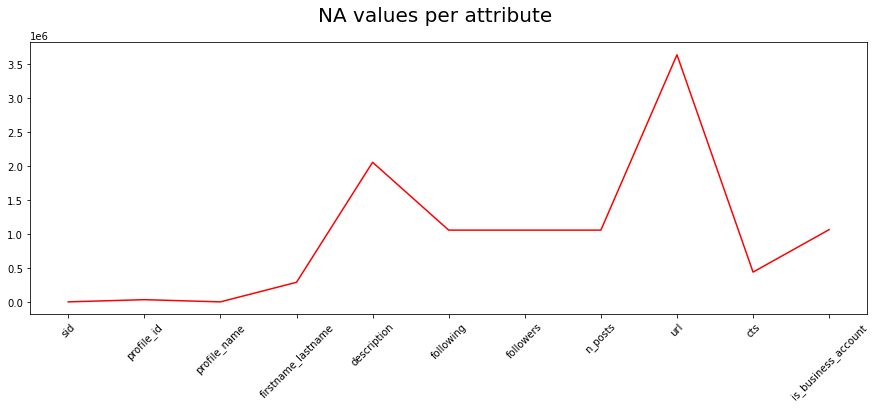

In [77]:
fig = plt.figure(figsize = (15, 5))
fig.suptitle('NA values per attribute', fontsize = 20)

x = list(profiles.columns.values)
plt.plot(x, na_values, color = 'red')
plt.xticks(rotation = 45)

plt.show()

And we plot the NA percentages for completeness' sake:

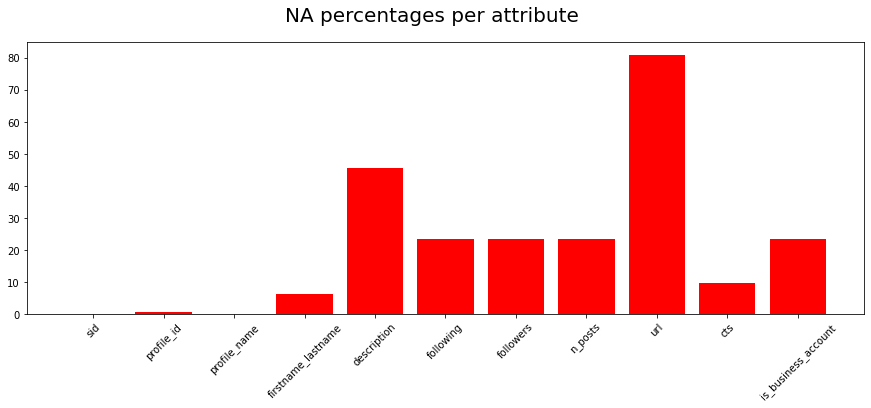

In [78]:
fig = plt.figure(figsize = (15, 5))
fig.suptitle('NA percentages per attribute', fontsize = 20)

x = list(profiles.columns.values)
plt.bar(x, na_percent, color = 'red')
plt.xticks(rotation = 45)

plt.show()

So we see that, of all the dataset columns, ***url*** is the one with the highest number of missing values up to even 80%. It is followed by ***description*** with about 45% of NA values, and ***following***, ***followers*** and ***n_posts*** that all stand at the same level around 25%. As it's unlikely that three random columns on such a big dataset share the *exact* number of NA values, we could suppose that maybe those information are somehow extracted or processed together.


Then we proceed with data cleaning.

In [7]:
profiles.sid.fillna(0, inplace=True)
profiles.profile_id.fillna(0, inplace=True)
profiles.profile_name.fillna('', inplace=True)
profiles.firstname_lastname.fillna('', inplace=True)
profiles.description.fillna('', inplace=True)
profiles.following.fillna(0, inplace=True)
profiles.followers.fillna(0, inplace=True)
profiles.n_posts.fillna(0, inplace=True)
profiles.url.fillna('', inplace=True)
profiles.cts.fillna('', inplace=True)
profiles.is_business_account.fillna(False, inplace=True)

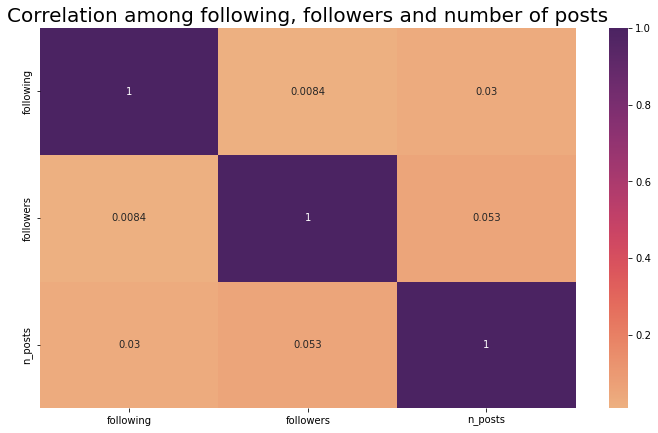

In [70]:
plt.figure(figsize = (12,7))
plt.title("Correlation among following, followers and number of posts", fontsize = 20)

corr_matrix1 = profiles[profiles.columns[5:8]].corr()

sbo.heatmap(corr_matrix1, annot=True, cmap="flare")

plt.show()

As we can see from the heatmap above, there's no significant correlation among the number of following profiles, follower profiles and posts. <br>
Now, to have a more complete insight of these characteristics' distribution, we plot the box chart for each of them:

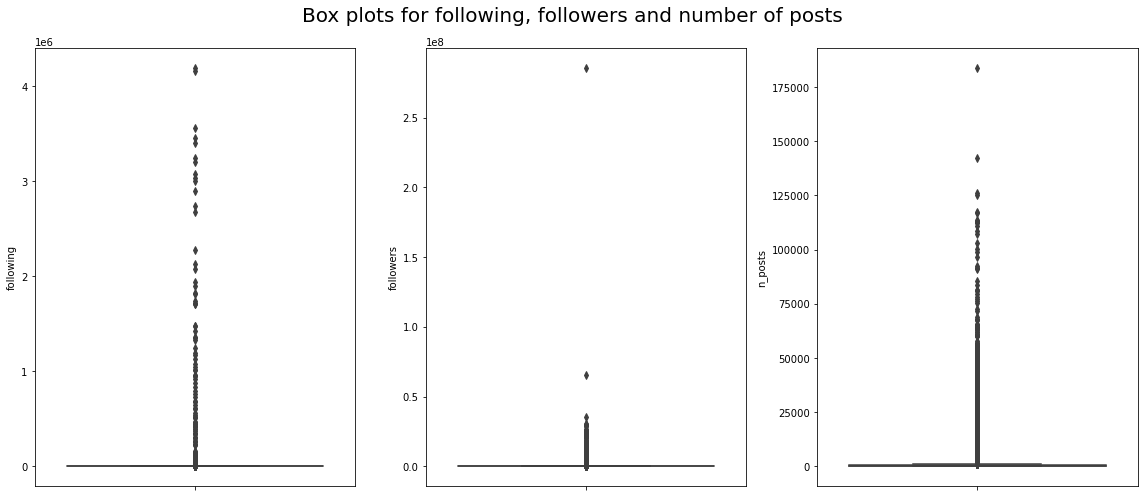

In [72]:
fig = plt.figure(figsize = (16, 7))
fig.suptitle('Box plots for following, followers and number of posts', fontsize = 20)

plt.subplot(1, 3, 1)
sbo.boxplot(y=profiles['following'])

plt.subplot(1, 3, 2)
sbo.boxplot(y=profiles['followers'])

plt.subplot(1, 3, 3)
sbo.boxplot(y=profiles['n_posts'])

plt.tight_layout()
plt.show()

As we can see, all the distributions are quite unbalanced with heavy tails full of outliers. In other words there are many observations whose data values are far from the center of the sample and that represent anomalies in the distribution.

In [ ]:
profiles.to_csv('cleaned_profile.csv')

In [ ]:
del profiles

Now we are going to have a quick glimpse at some summaries of locations dataset.

In [8]:
locations = pd.read_csv('~/instagram_locations.zip', delimiter='\t')

In [9]:
locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [10]:
locations.describe()

,sid,id,lat,lng
count,1.022658e+06,1.022658e+06,1.016495e+06,1.016495e+06
mean,5.274856e+05,3.152851e+14,-1.529215e+01,3.421718e+01
std,2.994567e+05,5.795031e+14,7.615085e+01,2.201081e+01
min,1.000000e+00,7.000000e+00,-1.799830e+02,-9.000000e+01
25%,2.688392e+05,2.522377e+08,-8.015575e+01,2.997555e+01
50%,5.300405e+05,8.573350e+08,-2.450000e+00,4.067820e+01
75%,7.866598e+05,3.304662e+14,3.071740e+01,4.884722e+01
max,1.043657e+06,2.402148e+16,1.799941e+02,8.999870e+01


In [11]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

Conversely, the dataset **instagram_locations** consists of 1022658 observations and 23 characteristics. The detailed attributes are:
  1. ***sid***: sequence ID of the location (int represented with 64 bits);
  2. ***id***: Instagrams ID that can be used on a website url (int represented with 64 bits);
  3. ***name***: location name (object);
  4. ***street***: street address of the location (object);
  5. ***zip***: zip code of the location (object);
  6. ***city***: city name of the location (object);
  7. ***region***: region name of the location (object);
  8. ***cd***: code code for the country in which the location is (object);
  9. ***phone***: location phone in format as on the Instragram (object);
  10. ***aj_exact_city_match***: Instagram's internal key for cities (object);
  11. ***aj_exact_country_match***: Instagram's internal key for countries (object);
  12. ***blurb***: description of the place (object);
  13. ***dir_city_id***: Instagram's internal City ID (object);
  14. ***dir_city_name***: name of the city in which the location is placed (object);
  15. ***dir_city_slug***: tag of the city in which the location is placed (object);
  16. ***dir_country_id***: Instagram's internal Country ID (object);
  17. ***dir_country_name***: name of the country in which the location is placed (object);
  18. ***lat***: location latitude (float represented with 64 bits);
  19. ***lng***: location longitude (float represented with 64 bits);
  20. ***primary_alias_on_fb***: boolean flag (object);
  21. ***slug***: (object);
  22. ***website***: URL to the location web site, may contain more then 1 URL (object);
  23. ***cts***: timestamp when the location was visited (object).

In [12]:
locations.sid.fillna(0, inplace=True)
locations.id.fillna(0, inplace=True)
locations.name.fillna('', inplace=True)
locations.street.fillna('', inplace=True)
locations.zip.fillna('', inplace=True)
locations.city.fillna('', inplace=True)
locations.region.fillna('', inplace=True)
locations.cd.fillna('', inplace=True)
locations.phone.fillna('', inplace=True)
locations.aj_exact_city_match.fillna(False, inplace=True)
locations.aj_exact_country_match.fillna(False, inplace=True)
locations.blurb.fillna('', inplace=True)
locations.dir_city_id.fillna('', inplace=True)
locations.dir_city_name.fillna('', inplace=True)
locations.dir_city_slug.fillna('', inplace=True)
locations.dir_country_id.fillna('', inplace=True)
locations.dir_country_name.fillna('', inplace=True)
locations.lat.fillna(0, inplace=True)
locations.lng.fillna(0, inplace=True)
locations.primary_alias_on_fb.fillna('', inplace=True)
locations.slug.fillna('', inplace=True)
locations.website.fillna('', inplace=True)
locations.cts.fillna('', inplace=True)

In [ ]:
locations.to_csv('cleaned_locations.csv')

In [ ]:
del locations

________________

# **Research Question 2 - Basic insights**

## Plot the number of posts for each profile in descending order.

For this question we decided to take care of the first 15 profiles, otherwise the plot would have been a mess!

<BarContainer object of 15 artists>

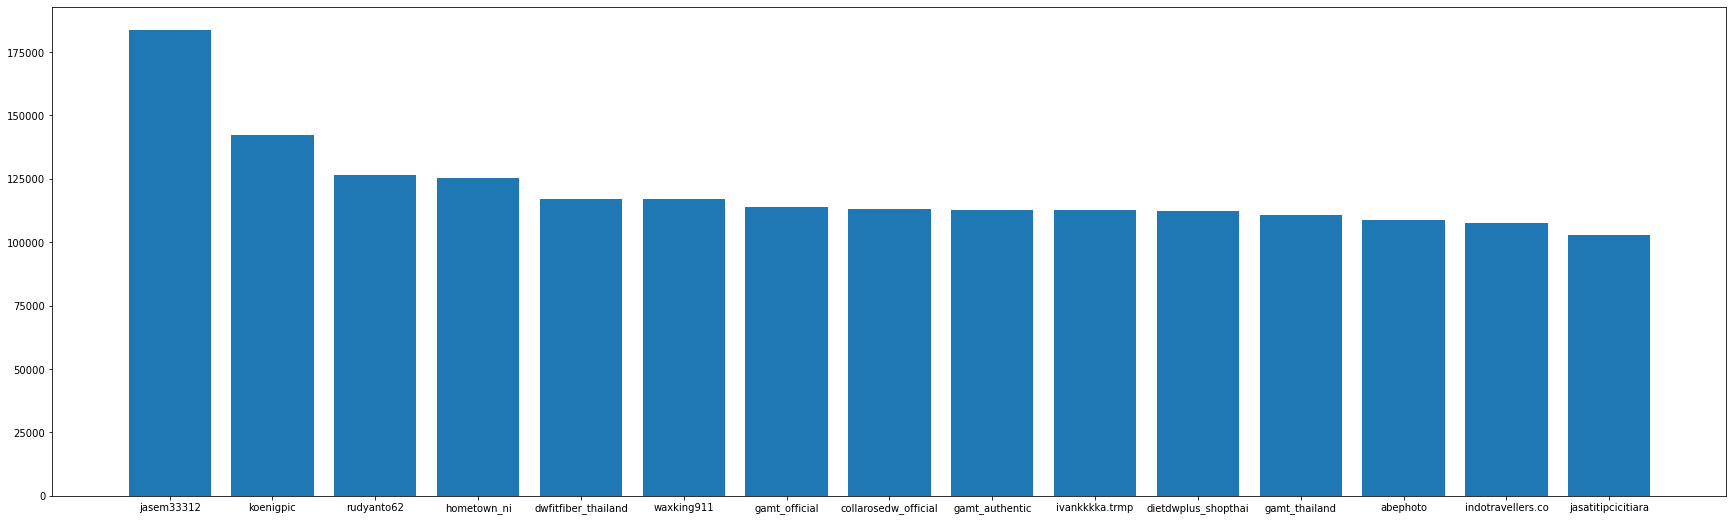

In [14]:
profiles_sort = profiles.sort_values(by = 'n_posts', ascending = False).head(15) #let's sort the dataset by n° of post(n_post)
fig, ax = plt.subplots(figsize = (30,9))
plt.bar(profiles_sort.profile_name,profiles_sort.n_posts)

## What posts have the highest number of "likes"?

In [ ]:
posts = pd.read_csv('~/posts.csv', delimiter = '\t', usecols = ['profile_id', 'post_id', 'numbr_likes'])

In [5]:
#we apply this command in order to be able to sort by numbr_likes
posts.numbr_likes = pd.to_numeric(posts.numbr_likes, errors ='coerce')

posts_sort = posts.sort_values(by = 'numbr_likes', ascending = False) #let's sort the dataset by n° of likes(numbr_likes)

#Let's print profile_id, post_id and number of likes, of the posts which have the highest number of likes!
posts_sort.head(10)

,post_id,profile_id,numbr_likes
19624373,Bt3yaXmAM0d,4.906778e+07,8822952.0
19624276,BuwffB7g8cK,4.906778e+07,5447066.0
19624370,Buc1gyZAaMQ,4.906778e+07,5116398.0
19624274,BvcukE8AMuG,4.906778e+07,4271466.0
39701506,BqSLFVBFLfq,4.275539e+08,4264745.0
6293983,BwTSXBKg7gN,1.518284e+09,3586546.0
19624374,Btw8pFXAvQm,4.906778e+07,3558599.0
19802308,BvC3n6_gqin,2.153681e+09,3533326.0
30850973,Bw7vqLrFkHi,2.031501e+07,3340297.0
39813074,Bw2gTH1AiDA,3.530696e+07,3311246.0


In [6]:
profiles[profiles.profile_id == 49067778.0] #actually in the table above, for the profile_id which compair more, after an investigation
#we noticed that is missing a 7 so in this command we add a 7 inside this profile_id

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
1287123,531404,49067778.0,lilireinhart,Lili Reinhart,100% High Fructose Corn Syrup,639.0,16825239.0,849.0,NaN,NaN,False


We can observe that five of the ten most liked posts have been posted by the user 'lilireinhart'.

In [ ]:
del posts

## What posts have the most and the least number of comments?

In [ ]:
posts_comments = pd.read_csv('~/posts.csv',delimiter='\t',usecols=['post_id','number_comments'])

In [35]:
posts_comments.number_comments = pd.to_numeric(posts_comments.number_comments,errors='coerce')

In [37]:
max_mask = (posts_comments['number_comments']==posts_comments['number_comments'].max())
min_mask = (posts_comments['number_comments']==posts_comments['number_comments'].min())

most_commented = posts_comments[max_mask]
less_commented = posts_comments[min_mask]

In [38]:
most_commented.head()

,post_id,number_comments
40147877,BAlXkoKHynb,208596031.0


In [40]:
less_commented.head()

,post_id,number_comments
0,BXdjjUlgcgq,0.0
2,BRgkjcXFp3Q,0.0
3,BKTKeNhjEA7,0.0
4,8-NQrvoYLX,0.0
11,Bx-ptmpinBs,0.0
12,Bx9uKZAAHDg,0.0
13,Bx5qGE0AlMM,0.0
23,Bxf-Vl4lK2S,0.0
24,BxCrxafBm-9,0.0
28,BwRE4lYhQ3r,0.0


## How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [41]:
posts_locations = pd.read_csv('~/posts.csv', delimiter='\t', usecols=['post_id','location_id'])

In [53]:
posts_locations.location_id.fillna(0,inplace=True)

In [56]:
tagged = len(posts_locations[posts_locations.location_id > 0])
untagged = len(posts_locations[posts_locations.location_id == 0])

print("The number of posts that includes tagged location is:      ", tagged)
print("The number of posts that don't include tagged locations is:", untagged)

The number of posts that includes tagged location is:       29737424
The number of posts that don't include tagged locations is: 12973283


We can plot this result with a piechart, to highlight the percentage of posts that include tagged locations and the percentage of posts that don't do so.

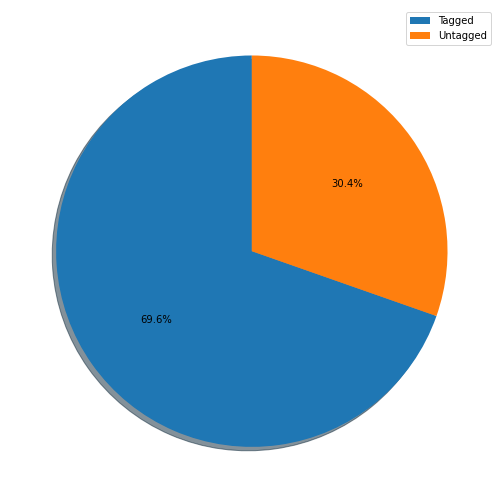

In [67]:
fig, ax = plt.subplots(figsize=(9,9))
labels ='Tagged','Untagged'
ax.pie([tagged,untagged], labels=labels,autopct='%1.1f%%',shadow=True, startangle=90, labeldistance=None)
plt.legend()
plt.show()

This chart makes it clear that people usually share the location where they took a picture or filmed a video. This is probably because tagging places in Instagram posts is an essential part of Instagram's network externalities.

In [ ]:
del posts_locations

## How many posts include only photos? How many also have videos?

In [7]:
posts_type = pd.read_csv('~/posts.csv', delimiter='\t', usecols=['post_id','post_type'])
posts_type_size = posts_type.shape

In [8]:
posts_type.post_type.fillna(0, inplace=True)
only_photos = (posts_type['post_type']==1).sum()
only_videos = (posts_type['post_type']==2).sum()
multy = (posts_type['post_type']==3).sum()

In [9]:
print('The percentage of posts with only photos is: ', "%.5f" % (100*only_photos/posts_type_size[0]), '%')
print('The percentage of posts with only videos is: ', "%.5f" % (100*only_videos/posts_type_size[0]), ' %')
print('The percentage of miscellaneous posts is:    ', "%.5f" % (100*multy/posts_type_size[0]), ' %')

The percentage of posts with only photos is:  97.24607 %
The percentage of posts with only videos is:  2.65687  %
The percentage of miscellaneous posts is:     0.09586  %


This result clearly highlights that photos are the dominant form of communication through Instagram. That's probably because of the immediacy of take a picture and post it, instead of filming a video. 


In [ ]:
del posts_type

## What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [10]:
business_accounts     = (profiles['is_business_account'] == True).sum()
non_business_accounts = (profiles['is_business_account'] == False).sum()

print('The percentage of business accounts is:    ' "%.5f" % (100*business_accounts/profiles.shape[0]), '%')
print('The percentage of non-business accounts is:' "%.5f" % (100*non_business_accounts/profiles.shape[0]), '%')

The percentage of business accounts is:    18.96524 %
The percentage of non-business accounts is:57.43474 %


Since we cleaned the data, all the missing information about *is_business_account* have been corrected with false flags, assuming that we would have been given certain information about an account if it was a business one. 
The percentage we are given should be compared with nowadays data, since during years Instagram assert itself as a business platform. 


This information confirms that Instagram is a drive for communication between producers and costumers, since it allows producers to collect information about their potential costumer. The structure of the population with respect to this variable reflects the golden rule of a Pareto distribution, as an already mature market structure would do. 

______________

# **Research Question 3 - When do users publish the most?**

## What is the most common time in which users publish their posts?


In [3]:
posts_date = pd.read_csv('~/posts_dates.csv',delimiter='\t')

In [4]:
posts_date.cts.fillna('', inplace=True)
posts_date.cts = pd.to_datetime(posts_date.cts)

In [5]:
parsed_hours = pd.DataFrame({
    'post_id':posts_date.post_id,
    'Timestamp':posts_date.cts.dt.time
})

In [6]:
parsed_hours.Timestamp.mode()

0    21:00:09
dtype: object

This information is clearly a simple index over an unstructured population. We'll get more useful information by building the required method. 

## Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.


In [7]:
def plot_timestamps_occurrencies(timestamps):
    occ = {}
    for timeinterval in timestamps:
        initial_time = timeinterval[0].split(':')
        final_time   = timeinterval[1].split(':')
        
        initial_hour, initial_minute, initial_second = int(initial_time[0]), int(initial_time[1]), int(initial_time[2])
        final_hour, final_minute, final_second = int(final_time[0]), int(final_time[1]), int(final_time[2])
        
        timestamp_1 = time(initial_hour, initial_minute, initial_second)
        timestamp_2 = time(final_hour, final_minute, final_second)
        occ[timeinterval] = len(parsed_hours[(parsed_hours.Timestamp > timestamp_1) & (parsed_hours.Timestamp < timestamp_2)])
        
    plt.ticklabel_format(style='plain')
    plt.bar(range(len(occ)), list(occ.values()), align='center')
    plt.xticks(range(len(occ)), list(occ.keys()), rotation='vertical')
    plt.show()

## Use the function that you created in the previous literal to plot the number of posts between the following time intervals.

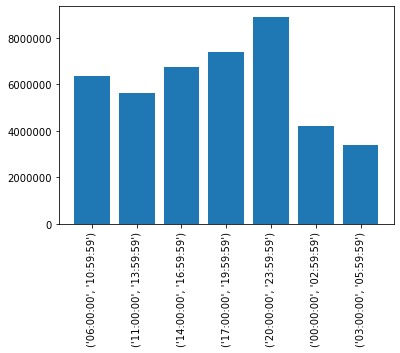

In [8]:
plot_timestamps_occurrencies([('06:00:00','10:59:59'),
                              ('11:00:00','13:59:59'),
                              ('14:00:00','16:59:59'),
                              ('17:00:00','19:59:59'),
                              ('20:00:00','23:59:59'),
                              ('00:00:00','02:59:59'),
                              ('03:00:00','05:59:59')])

The most common time-lapse of the day in which people usually posts on Instagram is $20:00:00-23:59:59$. In this time of the day people have usually ended up their tasks, so maybe they feel more free to post on Instagram. Furthermore, 
it is plausible to argue that business accounts targets this time-lapse for the same reasons, because the users influx is probabily more substantial in that moment of the day. 

In [ ]:
del posts_date

_________________________________________

# **Research Question 4 - Enhancing our analysis over profiles datasets**

First, we want to build a useful and optimized subdataset over the posts' one.

In [ ]:
posts = pd.read_csv('~/posts.csv', delimiter='\t', usecols = ['profile_id','post_id','numbr_likes','number_comments','cts'])

In [4]:
posts.numbr_likes = pd.to_numeric(posts.numbr_likes, errors='coerce')
posts.number_comments = pd.to_numeric(posts.number_comments, errors='coerce')

posts.numbr_likes.fillna(0, inplace=True)
posts.number_comments.fillna(0, inplace=True)

posts.cts.fillna('', inplace=True)

posts.cts = pd.to_datetime(posts.cts).dt.time

In [5]:
posts.head()

,post_id,profile_id,cts,numbr_likes,number_comments
0,BXdjjUlgcgq,2.237948e+09,20:06:57,80.0,0.0
1,BVg0pbolYBC,5.579335e+09,09:31:16,25.0,1.0
2,BRgkjcXFp3Q,3.134296e+08,20:05:03,9.0,0.0
3,BKTKeNhjEA7,1.837593e+09,16:27:16,4.0,0.0
4,8-NQrvoYLX,1.131527e+09,10:19:27,8.0,0.0


For this question we also need the profiles' dataset, in order to join it with the posts one. 

In [6]:
profiles = pd.read_csv('~/instagram_profiles.zip', delimiter='\t', usecols=['profile_id','n_posts'])

sorted_profiles = profiles.sort_values(by='n_posts',ascending=False).reset_index(drop=True)

## Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.


In [7]:
def posts_by_id(id):
    return posts[posts['profile_id']==id]

## Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.


In [8]:
def posts_ntop(n):
    top_profiles = sorted_profiles.reset_index(drop=True)
    top_posts = posts_by_id(top_profiles['profile_id'][0])                                          #Initialize a new dataframe
    counter = 1
    flag = True
    while flag:
        if len(posts_by_id(top_profiles['profile_id'][counter])) > 0:
            top_posts = top_posts.append(posts_by_id(top_profiles['profile_id'][counter]))          #And completing it to be able to use pandas methods to group by values and extract mean
        if len(pd.unique(top_posts['profile_id'])) == n:
            flag = False
        counter += 1
    return top_posts

## What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?


In [9]:
tentop = posts_ntop(10)
tentop.groupby(['profile_id']).mean().rename(columns={'numbr_likes':'mean_likes', 'number_comments':'mean_comments'})

,mean_likes,mean_comments
profile_id,,
9.813508e+06,0.296296,0.000000
1.996648e+08,7.666667,0.000000
2.181730e+08,0.400000,0.040000
2.855497e+08,3.921875,0.000000
1.087614e+09,2.026316,0.184211
1.273455e+09,2.960000,0.040000
1.603890e+09,6.477612,0.044776
1.607309e+09,1.540541,0.000000
1.701679e+09,1.447368,0.000000


## Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.


In [10]:
def tentop_plot_timestamps_occurrencies(timestamps):
    occ = {}
    for timeinterval in timestamps:
        initial_time = timeinterval[0].split(':')
        final_time   = timeinterval[1].split(':')
        
        initial_hour, initial_minute, initial_second = int(initial_time[0]), int(initial_time[1]), int(initial_time[2])
        final_hour, final_minute, final_second = int(final_time[0]), int(final_time[1]), int(final_time[2])
        
        timestamp_1 = time(initial_hour, initial_minute, initial_second)
        timestamp_2 = time(final_hour, final_minute, final_second)
        occ[timeinterval] = len(tentop[(tentop.cts > timestamp_1) & (tentop.cts < timestamp_2)])
        
    plt.ticklabel_format(style='plain')
    plt.bar(range(len(occ)), list(occ.values()), align='center')
    plt.xticks(range(len(occ)), list(occ.keys()), rotation='vertical')
    plt.show()

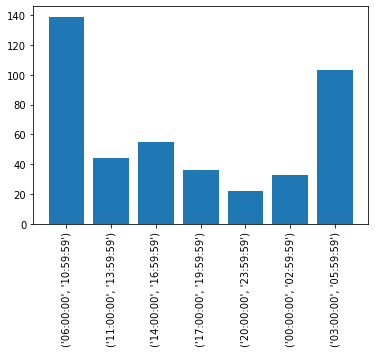

In [11]:
tentop_plot_timestamps_occurrencies([('06:00:00','10:59:59'),
                                     ('11:00:00','13:59:59'),
                                     ('14:00:00','16:59:59'),
                                     ('17:00:00','19:59:59'),
                                     ('20:00:00','23:59:59'),
                                     ('00:00:00','02:59:59'),
                                     ('03:00:00','05:59:59')])

If we compare this chart with the one regarding the general trend among all the users, we'll find they're different.
First of all, the global trend is increasing in the slot (11:00-20:00) until the peak, while these top 10 users posts don't show a trend. 
This means that their behaviour is queit insignificant in determining the global trend. 

In [12]:
del profiles
del sorted_profiles
del posts
del tentop

_________________________

# **Research Question 5 - Influential influencers**

## Plot the top 10 most popular users in terms of followers and their number of posts.

In [3]:
profiles = pd.read_csv('~/instagram_profiles.zip', delimiter = '\t', usecols = ['profile_id', 'profile_name', 'followers', 'n_posts'])
top_10_profiles = profiles.sort_values(by ='followers', ascending = False)
top_10_profiles = top_10_profiles.head(10)
#top_n_post.profile_name,top_n_post.n_posts

<BarContainer object of 10 artists>

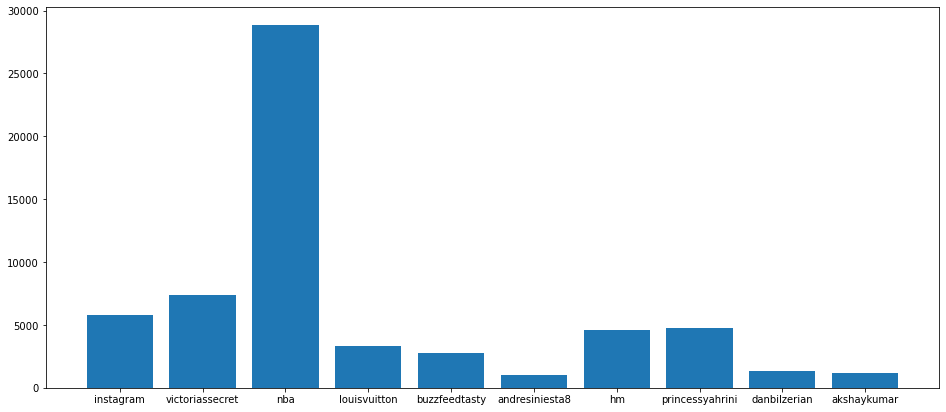

In [4]:
figure, axis = plt.subplots(figsize = (16,7))
plt.bar(top_10_profiles.profile_name,top_10_profiles.n_posts)

## Who is the most influential user?

In [5]:
top_n_post = profiles.sort_values(by ='followers', ascending = False).head(1) #created a subdataset which contains profiles of who have the highest number of post
print(f'The most influential user is: {top_n_post.profile_name.values[0]}')

The most influential user is: instagram


## Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.


In [6]:
posts = pd.read_csv('~/posts.csv', delimiter="\t", usecols = ['profile_id', 'location_id'])

In [7]:
new_df = pd.merge(top_10_profiles, posts, on= 'profile_id', how = 'left')
new_df.rename(columns = {0:'times_seen_location'}, inplace = True)
new_df.rename(columns = {'location_id':'id'}, inplace = True)

In [9]:
city =pd.read_csv('~/instagram_locations.zip', delimiter="\t", usecols = ['id', 'name','city'])
merge = pd.merge(new_df,city, on = 'id', how = 'left')

In [10]:
time_seen_areas = merge.groupby(['name']).size().reset_index().sort_values([0],ascending=False)
time_seen_areas.rename(columns = {0:'times_seen_location'}, inplace = True)
time_seen_areas.rename(columns = {'location_id':'id'}, inplace = True)

In [11]:
time_seen_areas = time_seen_areas[time_seen_areas.times_seen_location>1]
time_seen_areas

,name,times_seen_location
70,"Sydney, Australia",9
80,Victoria's Secret,4
37,"Kobe-shi, Hyogo, Japan",3
81,Wells Fargo Center,2
9,Bel-Air Estate,2
11,"Bora Bora, French Polynesia",2


These are the most tagged areas by the 10 most influential profiles.

In [13]:
city =pd.read_csv('~/instagram_locations.zip', delimiter="\t", usecols = ['id','city'])
merge = pd.merge(new_df,city, on = 'id', how = 'left')
time_seen_city = merge.groupby(['city']).size().reset_index().sort_values([0],ascending=False)
time_seen_city.rename(columns = {0:'times_seen_location'}, inplace = True)
time_seen_city.rename(columns = {'location_id':'id'}, inplace = True)

In [14]:
time_seen_city = time_seen_city[time_seen_city.times_seen_location>1]
time_seen_city

,city,times_seen_location
38,"New York, New York",9
55,"Sydney, Australia",9
34,"Los Angeles, California",5
52,Singapore,4
21,"Houston, Texas",3
24,"Kobe-shi, Hyogo, Japan",3
32,"London, United Kingdom",3
3,"Amsterdam, Netherlands",3
59,"Vaitape, French Polynesia",2
29,"Las Vegas, Nevada",2


Instead these are the cities where the most locations have been tagged by the 10 most influential profiles.

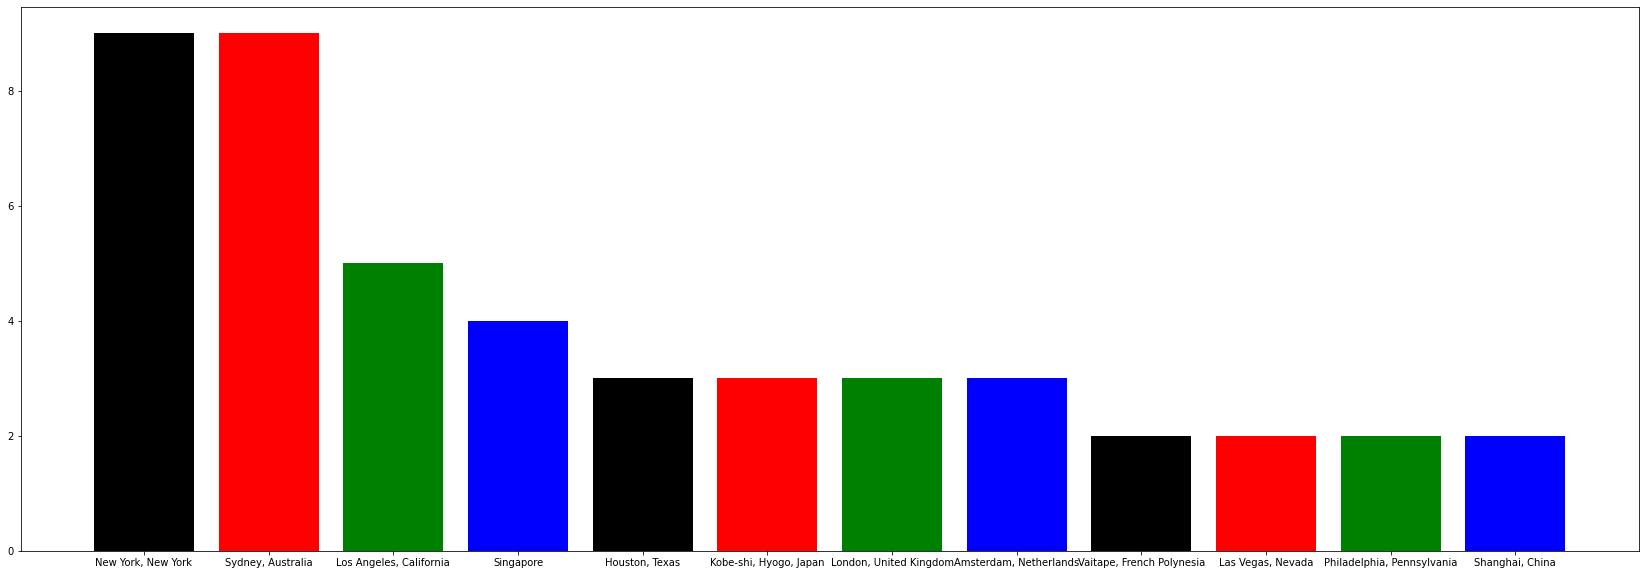

In [15]:
figure, axis = plt.subplots(figsize = (29,10))
x_pos = np.arange(len(time_seen_city.city))
plt.bar(x_pos, time_seen_city.times_seen_location, color=('black', 'red', 'green', 'blue'))
plt.xticks(x_pos, time_seen_city.city)
plt.show()

## How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [ ]:
posts = pd.read_csv('~/posts.csv', delimiter="\t", usecols = ['profile_id', 'post_type','numbr_likes','number_comments'])

In [18]:
posts.numbr_likes = pd.to_numeric(posts.numbr_likes, errors ='coerce')
posts.number_comments = pd.to_numeric(posts.number_comments, errors ='coerce')

In [19]:
new_df = pd.merge(top_10_profiles, posts, on= 'profile_id', how = 'left')
new_df

,profile_id,profile_name,followers,n_posts,post_type,numbr_likes,number_comments
0,25025320.0,instagram,285457645.0,5760.0,1.0,125428.0,1240.0
1,25025320.0,instagram,285457645.0,5760.0,1.0,669786.0,4818.0
2,25025320.0,instagram,285457645.0,5760.0,1.0,1914299.0,20065.0
3,25025320.0,instagram,285457645.0,5760.0,1.0,840588.0,3627.0
4,25025320.0,instagram,285457645.0,5760.0,1.0,385494.0,5664.0
...,...,...,...,...,...,...,...
136,907025384.0,akshaykumar,26252169.0,1173.0,1.0,241543.0,1152.0
137,907025384.0,akshaykumar,26252169.0,1173.0,1.0,797506.0,2733.0
138,907025384.0,akshaykumar,26252169.0,1173.0,1.0,921671.0,9349.0
139,907025384.0,akshaykumar,26252169.0,1173.0,1.0,1402087.0,16180.0


In [20]:
posts_type = new_df.groupby(['profile_id', 'post_type', 'profile_name']).size().reset_index()
posts_type.rename(columns = {0:'published_posts'}, inplace = True)
posts_type

,profile_id,post_type,profile_name,published_posts
0,3.416684e+06,1.0,victoriassecret,5
1,3.416684e+06,2.0,victoriassecret,2
2,2.082449e+07,1.0,nba,13
3,2.082449e+07,2.0,nba,5
4,2.341008e+07,1.0,hm,2
5,2.423993e+07,1.0,princessyahrini,23
6,2.423993e+07,2.0,princessyahrini,3
7,2.502532e+07,1.0,instagram,31
8,2.502532e+07,2.0,instagram,3
9,5.041706e+07,1.0,danbilzerian,15


In [21]:
new_df2 = posts_type.groupby(['profile_name', 'published_posts', 'post_type']).agg({'published_posts': 'sum'})
new_df3 = new_df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
posts_type['%'] = 100 * posts_type['published_posts'] / posts_type.groupby('profile_name')['published_posts'].transform('sum')
posts_type

,profile_id,post_type,profile_name,published_posts,%
0,3.416684e+06,1.0,victoriassecret,5,71.428571
1,3.416684e+06,2.0,victoriassecret,2,28.571429
2,2.082449e+07,1.0,nba,13,72.222222
3,2.082449e+07,2.0,nba,5,27.777778
4,2.341008e+07,1.0,hm,2,100.000000
5,2.423993e+07,1.0,princessyahrini,23,88.461538
6,2.423993e+07,2.0,princessyahrini,3,11.538462
7,2.502532e+07,1.0,instagram,31,91.176471
8,2.502532e+07,2.0,instagram,3,8.823529
9,5.041706e+07,1.0,danbilzerian,15,100.000000


As you can see from the table above, no posts published by the most influential profiles contain both videos and photos. In particular, 6 out of 10 of them published posts containing only photos; of these 6 users, therefore, there are no posts with videos, but only posts containing photos. As for the 4 profiles that have published both posts with photos and posts containing videos, they are Instagram, princessyahrini, NBA and VictoriaSecret. In particular, as regards the last two, it is noted that the percentage of videos published is much bigger then the percentage of videos published from the other two profiles (Instagram and princessyahrini). The fact that NBA has a high number of videos published compared to the others, is presumably given by the fact that being a sports association it publishes many videos regarding highlights of played matches or videos regarding clips of matches.

## How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [22]:
likes = new_df.groupby(['profile_id', 'post_type','profile_name','followers']).sum().reset_index()
likes['published_posts'] = posts_type['published_posts']
likes['mean_comments'] = likes['number_comments']/likes['published_posts']
likes['mean_likes'] = likes['numbr_likes']/likes['published_posts']
likes['%like/followers'] = likes['mean_likes']/likes['followers']*100

In [23]:
pd.options.display.float_format = '{:.3f}'.format
likes

,profile_id,post_type,profile_name,followers,n_posts,numbr_likes,number_comments,published_posts,mean_comments,mean_likes,%like/followers
0,3416684.000,1.000,victoriassecret,65269440.000,36775.000,1153749.000,2192.000,5,438.400,230749.800,0.354
1,3416684.000,2.000,victoriassecret,65269440.000,14710.000,522816.000,1166.000,2,583.000,261408.000,0.401
2,20824486.000,1.000,nba,35339708.000,374608.000,3149064.000,14142.000,13,1087.846,242235.692,0.685
3,20824486.000,2.000,nba,35339708.000,144080.000,1036478.000,5134.000,5,1026.800,207295.600,0.587
4,23410080.000,1.000,hm,29176804.000,9132.000,162427.000,730.000,2,365.000,81213.500,0.278
5,24239929.000,1.000,princessyahrini,29042823.000,108537.000,3263087.000,17421.000,23,757.435,141873.348,0.488
6,24239929.000,2.000,princessyahrini,29042823.000,14157.000,125291.000,2710.000,3,903.333,41763.667,0.144
7,25025320.000,1.000,instagram,285457645.000,178560.000,28083937.000,207802.000,31,6703.290,905933.452,0.317
8,25025320.000,2.000,instagram,285457645.000,17280.000,1780229.000,17248.000,3,5749.333,593409.667,0.208
9,50417061.000,1.000,danbilzerian,26476004.000,19665.000,12946699.000,128921.000,15,8594.733,863113.267,3.260


From the table above you can see how many likes and comments the posts with only photos or videos have received. In addition, for each profile (of the top 10) we have created two columns that respectively highlight the number of likes and the number of average comments for posts with only photos and with only videos. The column of average likes, we then compared it with the respective followers of the users, creating another column that actually indicates the average percentage of followers who like the posts. From this it is clear that the 'akshaykumar' and 'danbilzerian' profiles are those where on average more followers like the posts; in fact in these profiles, on average, respectively 3.9% and 3.3% of followers like the posts, while this percentage in all other profiles is always less than 1%, except in the 'andresiniesta8' profile, where it is equal at 1.6%.

_______________

# **Research Question 6 - Posting effectiveness**

## What is the average time (days and minutes) a user lets pass before publishing another post? 
Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

Load instagram_profiles.csv dataset into a Pandas Dataframe object:

In [3]:
data_profiles = pd.read_csv('~/instagram_profiles.zip', delimiter = '\t', usecols = ['sid',
                                                                                    'profile_name', 
                                                                                    'following', 
                                                                                    'followers',
                                                                                    'n_posts'])

Rename column 'sid' to 'sid_profile' (to simplify the merge operation later on):

In [4]:
data_profiles.rename(columns = {'sid':'sid_profile'}, inplace = True)

Get a glimpse of the dataframe structure:

In [5]:
data_profiles

,sid_profile,profile_name,following,followers,n_posts
0,4184446,jphillip033,250.0,146.0,170.0
1,4184457,mama_haas,534.0,1145.0,2878.0
2,4184460,yellowlightbreen,469.0,324.0,431.0
3,4184461,tec1025,NaN,NaN,NaN
4,4184462,luckyfluff,NaN,NaN,NaN
...,...,...,...,...,...
4509581,4184467,karenarkesteyn,468.0,481.0,497.0
4509582,4184469,jornvlaeminck,NaN,NaN,NaN
4509583,4184470,s_degol,NaN,NaN,NaN
4509584,4184473,anwilms,504.0,153.0,183.0


Define a couple of useful functions:

In [6]:
#Function to clean and prepare the dataframe for further processing
def refine_result(dataframe):
    dataframe.drop_duplicates(inplace = True)
    dataframe.dropna(inplace = True)
    dataframe.drop(dataframe[dataframe.n_posts <= 1].index, inplace = True)
    dataframe.cts = pd.to_datetime(dataframe.cts)
    
#Function that calculates the average delta among a group of user's posts
def average_time(grp):
    dict = {}
    for k, g in grp:
        if g.cts.size > 1:
            #Calculate timedeltas
            deltas = []
            for i in range(g.cts.size - 1):
                d = g.cts[grp.groups[k][i+1]] - g.cts[grp.groups[k][i]]
                deltas.append(d)
            #Calculate the average
            deltas = pd.Series(deltas) #convert to Series to use sum() method without iterating
            avg = deltas.sum() / len(deltas)
            dict[k] = avg
        else:
            continue 
    return dict

Actually begin data processing. <br>
**NOTE:** we merge on *sid_profile*, not on *profile_id*, because the latter contains NA values in the original datasets: joining them on that attribute would mean to cut out some potentially significant information about yet available profiles, so we choose sid_profile instead, that has an explicit constraint to be non-null.

In [ ]:
#Prepare a data structure to store the result of data processing.
#We use a dictionary with key = sid_profile, value = average posting rate
final = {}

#86 iterations expected
for chunk in tqdm(pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols = ['sid_profile', 'cts'], chunksize = 500000)):
   
    result = pd.merge(data_profiles, chunk, on = 'sid_profile')
    result.sort_values(by = 'cts', inplace = True)
    refine_result(result)
    
    grp = result.groupby('sid_profile')
    
    diz = average_time(grp)
    
    final.update(diz)
    
print('Unbelievably true')

In [ ]:
Checks on the dictionary's dimensionality:

In [ ]:
final

In [ ]:
#Number of posts and profiles actually common to both datasets
len(final)

**NOTE:** Some profiles may have been associated with a null average rate, so we remove them as they can't give us any relevant information for our analysis' purpose. So we do some further processing to extrapolate the answer.

In [ ]:
#Define a null delta to enable comparison
zero_delta = pd.Timedelta(0)

#Use dict comprehension to cut out the null deltas
final = {x:y for x, y in final.items() if y != zero_delta}

#Return a list of sid_profiles ordered by smaller average rate
top_freq = sorted(final, key = final.get) 

In [ ]:
top_freq #list of sid_profiles

<br>
We extract the average time of the first 3 users that post more frequently: <br>
<br>

In [ ]:
final[top_freq[0]]

In [ ]:
final[top_freq[1]]

In [ ]:
final[top_freq[2]]

<br>
We extract the first 3 users that have the previously shown average posting rates: <br>
<br>

In [ ]:
data_profiles.loc[data_profiles.sid_profile == top_freq[0]]

In [ ]:
data_profiles.loc[data_profiles.sid_profile == top_freq[1]]

In [ ]:
data_profiles.loc[data_profiles.sid_profile == top_freq[2]]

<br>
Finally, we graphically plot the number of following, followers and posts that these 3 users have. <br>
<br>

In [ ]:
df = pd.concat([x1, x2, x3])
df.pop('sid_profile')
df.pop('profile_name')
df

In [ ]:
df.plot(kind = 'bar', subplots = True, figsize = (16, 9), layout = (1, 3), title = 'Plot the top 3 users')
fig.tight_layout()

From the plot of the 3 profiles that publish more frequently, we can see that there's no real connection between the rate of posts and the number of followers they get. In fact, the third user has substancially more followers than the first two, though his/her average time of posts is smaller. Although, all 3 top users have an average posting rate of a few hundredths of a second, so it's a too small difference to claim anything. We should study the distribution of followers and number of posts for intervals of average rates of posting to make this investigation more relevant. In addition, the timedeltas are so small that this users are most likely bots or fake profiles, as we can say examining the data of the first profile: it published 18 posts with an average waiting time from one post to another of 0.09 seconds. It's not a rate a human can reasonably keep up with.

## Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

Define useful functions:

In [24]:
def refine_dataframe(dataframe):
    dataframe.drop_duplicates(inplace = True)
    dataframe.dropna(inplace = True)
    dataframe.cts = pd.to_datetime(dataframe.cts)
    
def check_time(hour):
    for slot in slots:
        if hour >= slot[0] and hour <= slot[1]:
            return slots.index(slot)

Start processing:

In [41]:
#We choose to define hourly intervals to have a meaningful range
slots = [(0, 1), (1, 2), (2, 3), (3, 4),
         (4, 5), (5, 6), (6, 7), (7, 8),
         (8, 9), (9, 10), (10, 11), (11, 12),
         (12, 13), (13, 14), (14, 15), (15, 16),
         (16, 17), (17, 18), (18, 19), (19, 20),
         (20, 21), (21, 22), (22, 23), (23, 24)]

t = [0] * 24             #final list with number of posts per time interval (aka list indexes)
t_likes = [0] * 24       #final list with number of likes per time interval
t_comments = [0] * 24    #final list with number of comments per time interval

for chunk in tqdm(pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols = ['sid', 'sid_profile', 'cts', 
                                                                                  'numbr_likes', 'number_comments'], chunksize = 500000)):
    
    refine_dataframe(chunk)

    chunk['hour'] = chunk.cts.dt.hour #add a column with the hour
    
    chunk['slot'] = chunk.hour.apply(lambda row: check_time(row)) #add a column with the index of the hour intervals the post falls in
    
    grp = chunk.groupby('slot')
    
    part_elements = list(grp.sid_profile.count()) #lista di quanti elementi cadono in ogni intervallo
    part_likes = list(grp.numbr_likes.sum()) #likes per interval
    part_comments = list(grp.number_comments.sum()) #comments per interval
    
    t = [t[i] + part_elements[i] for i in range(23)]
    t_likes = [t[i] + part_likes[i] for i in range(23)]
    t_comments = [t[i] + part_comments[i] for i in range(23)]

86it [04:52,  3.40s/it]


Checks on the results' dimensionality:

In [40]:
sum(t)

0

In [29]:
t

[2923183,
 1290434,
 1231644,
 1135290,
 1044289,
 1011923,
 1093280,
 1267423,
 1434724,
 1571222,
 1720602,
 1868544,
 2025569,
 2158976,
 2263009,
 2341052,
 2423768,
 2486381,
 2499758,
 2495269,
 2414932,
 2167378,
 1838215]

In [30]:
t_likes

[7493621,
 3287386,
 3061184,
 3955118,
 2235546,
 2260176,
 2337605,
 2835814,
 3119361,
 3585831,
 3889179,
 4540754,
 5234751,
 5405755,
 5615137,
 5737690,
 6760034,
 6826177,
 6694792,
 6165983,
 6416456,
 5101069,
 6039696]

In [31]:
t_comments

[3049808,
 1344505,
 1275203,
 1200409,
 1074190,
 1038361,
 1132811,
 1302467,
 1472180,
 1614632,
 1773536,
 1929505,
 2096765,
 2221679,
 2331562,
 2420425,
 2518896,
 2581853,
 2599456,
 2587657,
 2503618,
 2244335,
 1906676]

Compute the average number of likes and comments in each interval:

In [38]:
avg_likes = [round(t_likes[i] / t[i], 2) for i in range(23)] #list of average number of likes in the given time interval
avg_likes

NameError: name 'l2' is not defined

In [36]:
avg_comments = [round(t_comments[i] / t[i], 2) for i in range(23)] #list of average number of likes in the given time interval
len(avg_comments)

23

Finally, plot what we've found:

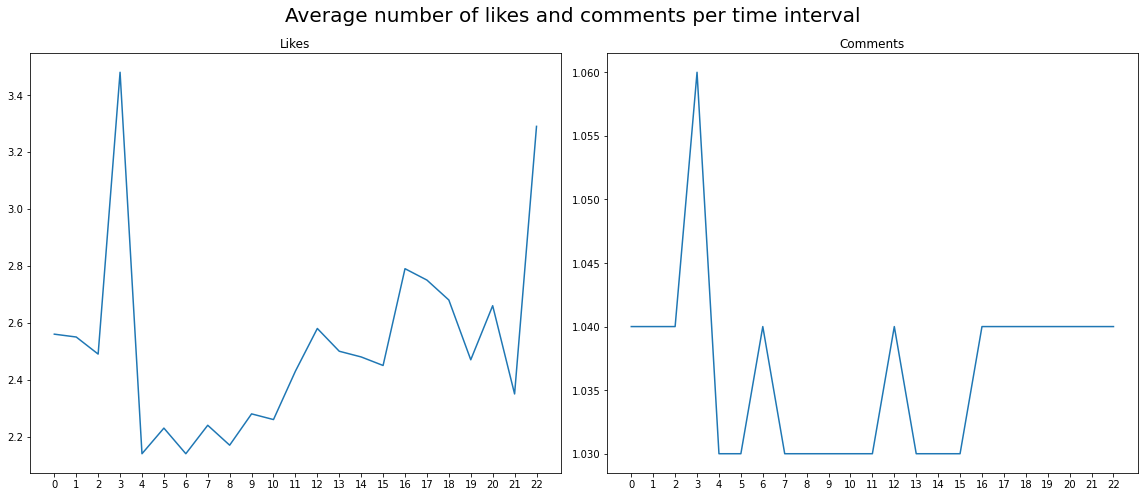

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 7))
fig.suptitle('Average number of likes and comments per time interval', fontsize = 20)

ax1.plot(avg_likes)
ax1.title.set_text('Likes')
ax1.set_xticks([x for x in range(len(avg_likes))]) #aka range(24)

ax2.plot(avg_comments)
ax2.title.set_text('Comments')
ax2.set_xticks([x for x in range(len(avg_likes))]) #aka range(24)

fig.tight_layout()

______________

# **Research Question 7 - Probabilities as drivers for prevision**

## What's the probability that a post receives more than 20% "likes" of the number of followers a user has?


We could define two random variables:
\begin{align}
X \sim Gauss(\mu_x,\sigma^2_x)\\
Y \sim Gauss(\mu_y,\sigma^2_y)
\end{align}

The first is the distribution of the number of likes through posts, the second is the distribution of the number of followers through profiles. 
With this assumptions we can calculate the required probability as

\begin{align}
P(X>\frac{20Y}{100})
\end{align} 

leveraging the properties of the linear combination of gaussians. In our research we found out that the three dataset are strongly unrelated, and since we need a JOIN between posts and profiles over the key *'profile_id'* to build a serviceable dataset in which we can find related pairs of post and profiles, this model need more assumptions that make it pretty unuseful.

So we decided to choose a poor frequentist approach.
By the way, computationally speaking this question is unsolvable with the methods we try to used. We defined two views over the profiles and posts datasets, by calling only the columns that are needed and providing a common column over which perform the join. In particular it is the primary key for profiles view, and so works as a foreign key for the posts view.

We then iterated through chunks of the posts, then made an outher join between the chunks and the profiles dataframe on *'profile_id'* key. At each iteration we updated a stored in a variable adding **len(data[data['numbr_likes']>0.2*data['followers']])**.

So we decided to shrink the two datasets to the population included in the first and third quartile, assuming we can consider both as gaussian distributed and therefore simmetrically excluding the two tails. Then we also provided some memory optimizazion methods, by changing the type of a series. 

In [13]:
from tqdm import tqdm

In [14]:
profiles_followers = pd.read_csv('~/instagram_profiles.zip', delimiter='\t',usecols=['profile_id','followers'])

profiles_followers.followers = pd.to_numeric(profiles_followers.followers, errors='coerce')
profiles_followers.followers.fillna(0,inplace=True)

profiles_followers = profiles_followers[profiles_followers['followers']>0]

In [15]:
profiles_followers.head()

,profile_id,followers
0,4.721050e+09,146.0
1,5.905830e+08,1145.0
2,1.074147e+09,324.0
5,1.450642e+08,192.0
6,2.061868e+09,4137.0


In [ ]:
posts_likes = (pd.read_csv('~/posts.csv', delimiter='\t', usecols=['profile_id','numbr_likes']))

posts_likes.numbr_likes = pd.to_numeric(posts_likes.numbr_likes,errors='coerce')

In [17]:
posts_likes.head()

,profile_id,numbr_likes
0,2.237948e+09,80.0
1,5.579335e+09,25.0
2,3.134296e+08,9.0
3,1.837593e+09,4.0
4,1.131527e+09,8.0


In [18]:
first_posts_quartile = posts_likes.quantile(q=0.25)['numbr_likes']
third_posts_quartile = posts_likes.quantile(q=0.75)['numbr_likes']

first_profiles_quartile = profiles_followers.quantile(q=0.25)['followers']
third_profiles_quartile = profiles_followers.quantile(q=0.75)['followers']

In [19]:
significant_posts = posts_likes[(posts_likes['numbr_likes']>first_posts_quartile)&
                                (posts_likes['numbr_likes']<third_posts_quartile)]

significant_profiles = profiles_followers[(profiles_followers['followers']>first_profiles_quartile)&
                                          (profiles_followers['followers']<third_profiles_quartile)]

In [ ]:
significant_posts.numbr_likes = significant_posts.numbr_likes.astype(np.float16)              #This is just memory optimization
significant_posts.profile_id = significant_posts.profile_id.astype(np.float16)

In [21]:
significant_profiles.profile_id = significant_profiles.profile_id.astype(np.float16)
significant_profiles.followers = significant_profiles.followers.astype(np.float16)

In [ ]:
significant_posts.to_csv('significant_posts.csv',index=False)

We also need to take in account the correct number of possible cases, dropping the NA from the joint tables since they are the result of a full outer join when there's no matching in the common column, and we are only considering data of which we have information about profiles, so we needed an additional variable to store the measure over which we are performing this method. 

In [22]:
high_recalling_posts = 0
measure = 0
for chunk in tqdm(pd.read_csv('significant_posts.csv', delimiter=',', chunksize=1000000)):
    data = chunk.join(significant_profiles, on='profile_id',how='outer', lsuffix='_left', rsuffix='_right')
    data = data.dropna()
    high_recalling_posts += len(data[data['numbr_likes']>0.2*data['followers']])
    measure += len(data)

0it [00:00, ?it/s]/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
22it [00:58,  2.66s/it]


In [23]:
print('The probability that a post receives more than 20% "likes" of the number of followers a user has is:', '%.2f' % (high_recalling_posts/measure*100), '%')

The probability that a post receives more than 20% "likes" of the number of followers a user has is: 17.77 %


In [ ]:
del profiles_followers
del posts_likes
del signficant_posts
del significant_profiles

________________________

## Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

We can make an initial assumption, trying to model the event *'The i-th user return to a location after having posted it in the past'*. We can say that this is a dicotomic event, that can be modelled with a Bernoulli random variable.

\begin{align}
X_i \sim Ber(p_i), \ i = 1,...,n
\end{align}

where $n$ is the number of users. We would like to find an estimator for $p_i$ in order to treat any of these Bernoulli random variables as independent and equally distributed. 


We are going to extract each $p_i$ from a frequentist perspective, and then we'll try to figure out a more general model.

In [25]:
locations = pd.read_csv('~/instagram_locations.zip', delimiter='\t',usecols=['id'])
posts_locations = pd.read_csv('~/posts.csv', delimiter='\t',usecols=['profile_id','location_id'])
locations = locations.rename(columns={'id':'location_id'})
posts_locations = posts_locations.dropna()
locations = locations.dropna()
locations.location_id.astype(np.float64)

0          1.102965e+14
1          2.743913e+08
2          1.488856e+14
3          2.632583e+08
4          4.061475e+14
               ...     
1022653    8.739264e+14
1022654    3.907075e+08
1022655    1.205467e+15
1022656    2.867948e+08
1022657    5.543307e+08
Name: location_id, Length: 1022658, dtype: float64

In [28]:
posts_locations.head()

,profile_id,location_id
0,2.237948e+09,1.022366e+15
1,5.579335e+09,4.574268e+14
2,3.134296e+08,4.574268e+14
3,1.837593e+09,4.574268e+14
4,1.131527e+09,4.574268e+14


In [27]:
locations.head()

,location_id
0,110296492939207
1,274391278
2,148885595789195
3,263258277
4,406147529857708


Now we can JOIN on 'profile_id' the two tables to get a view of every locations visited by every user. 

In [26]:
user_locations = locations.merge(posts_locations, on='location_id', how='outer')
user_locations = user_locations.dropna()

In [29]:
user_locations.head()

,location_id,profile_id
0,1.102965e+14,1.782736e+09
1,1.102965e+14,1.169129e+09
2,1.102965e+14,8.358455e+08
3,1.102965e+14,2.308603e+08
4,1.102965e+14,1.041179e+09


We need another view where we can see how many times have been visited by each of the users, groupping by over both profile_id and location_id. Than from this view we are going to consider only rows where the count is greater than 1, because these rows represent the repeated visits.

In [30]:
visited_locations = user_locations.groupby(['profile_id','location_id']).size().reset_index(name='Counts')
repeated_visits = visited_locations[visited_locations['Counts']>1]

In [31]:
repeated_visits.head(15)

,profile_id,location_id,Counts
40,4.0,6.076926e+08,2
44,4.0,1.814978e+14,2
48,11.0,5.389193e+14,2
68,19.0,2.139013e+08,2
120,28.0,4.808880e+05,2
139,28.0,4.496136e+07,3
202,34.0,2.711897e+08,2
206,34.0,7.884002e+08,2
303,83.0,1.138297e+14,2
306,88.0,2.729597e+08,2


Now finally we get the view where for every user we have the exactly amount of locations visited more than once. 

In [32]:
total_repeated_visits = repeated_visits.groupby(by='profile_id').nunique()
total_repeated_visits = total_repeated_visits.drop(axis=1, columns='Counts').rename(columns={'location_id':'revisited'}).dropna()

In [33]:
total_repeated_visits.head(15)

,revisited
profile_id,
4.0,2
11.0,1
19.0,1
28.0,2
34.0,2
83.0,1
88.0,1
118.0,2
192.0,2


We need another view where we can see the totally amount of visits and number of unique locations visited, because a user can visit more than twice the same location, so revisited ones are not simple given by the difference from total visits and unique ones. 

In [34]:
groupped_user_locations = user_locations.groupby(by='profile_id').count()
unique_user_locations = user_locations.groupby(by='profile_id').nunique()
data = unique_user_locations.merge(groupped_user_locations, on='profile_id', how='outer')
data = data.rename(columns={'location_id_x':'unique_locations','location_id_y':'total_locations'})
useful_data = data[(data['total_locations']>data['unique_locations'])]

In [37]:
data.head(15)

,unique_locations,total_locations,revisits
profile_id,,,
3.0,14,14,NaN
4.0,34,36,2.0
11.0,1,2,1.0
12.0,1,1,NaN
14.0,1,1,NaN
19.0,50,51,1.0
23.0,2,2,NaN
25.0,1,1,NaN
28.0,87,90,2.0


Finally, we come up with this table where we can compare some useful informations about visited locations and compute the probability that a user come back to a location from a frequentist perspective. Our measure will be $\frac{revisited}{unique locations}$.

In [38]:
final_table = useful_data.merge(total_repeated_visits, on='profile_id', how='outer')
final_table['Probability'] = final_table['revisited']/final_table['unique_locations']
final_table = final_table.drop(axis=1, columns=['unique_locations','total_locations','revisited'])

In [52]:
final_table.head(15)

,Probability
profile_id,
4.0,0.058824
11.0,1.000000
19.0,0.020000
28.0,0.022989
34.0,0.117647
83.0,0.083333
88.0,1.000000
118.0,0.333333
192.0,0.153846


We are going to take the median as an estimator of the probability of the initial assumption, and then we drop any further hypotesis about the model assuming every $X_i$ is indipendent and identically distributed.

In [49]:
p = final_table.Probability.median()
p

0.6

So we can estimate that every user as the probability of 60% to come back to a locations he already visit. This measure doesn't look as a robuste one, because it needed too many assumptions and approximation to be extracted.

In [53]:
del locations
del posts_locations
del user_locations
del visited_locations
del repeated_visits
del data
del final_table

_____________

# **Research Question 8 - Charts, statistical tests and further hypotesis**

## Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In [ ]:
like_comments = pd.read_csv('~/posts.csv', delimiter='\t', usecols=['numbr_likes','number_comments','cts'])

In [5]:
like_comments.cts.fillna('', inplace=True)
like_comments.cts = pd.to_datetime(like_comments.cts)
like_comments.cts = like_comments.cts.dt.hour                  #For further analysis we're only taking in account the hour a post was posted

In [6]:
like_comments.numbr_likes = pd.to_numeric(like_comments.numbr_likes, errors='coerce')
like_comments.number_comments = pd.to_numeric(like_comments.number_comments, errors='coerce')

In [7]:
like_comments.numbr_likes.dropna
like_comments.number_comments.dropna

<bound method Series.dropna of 0            0.0
1            1.0
2            0.0
3            0.0
4            0.0
            ... 
42710702     0.0
42710703     0.0
42710704     0.0
42710705     1.0
42710706    49.0
Name: number_comments, Length: 42710707, dtype: float64>

In [8]:
like_comments.head()

,cts,numbr_likes,number_comments
0,20.0,80.0,0.0
1,9.0,25.0,1.0
2,20.0,9.0,0.0
3,16.0,4.0,0.0
4,10.0,8.0,0.0


We sample over the whole population because the scatterplot is barely unreadable when plotting the whole dataset. 

In [9]:
like_comments_sampled = like_comments.sample(5000)

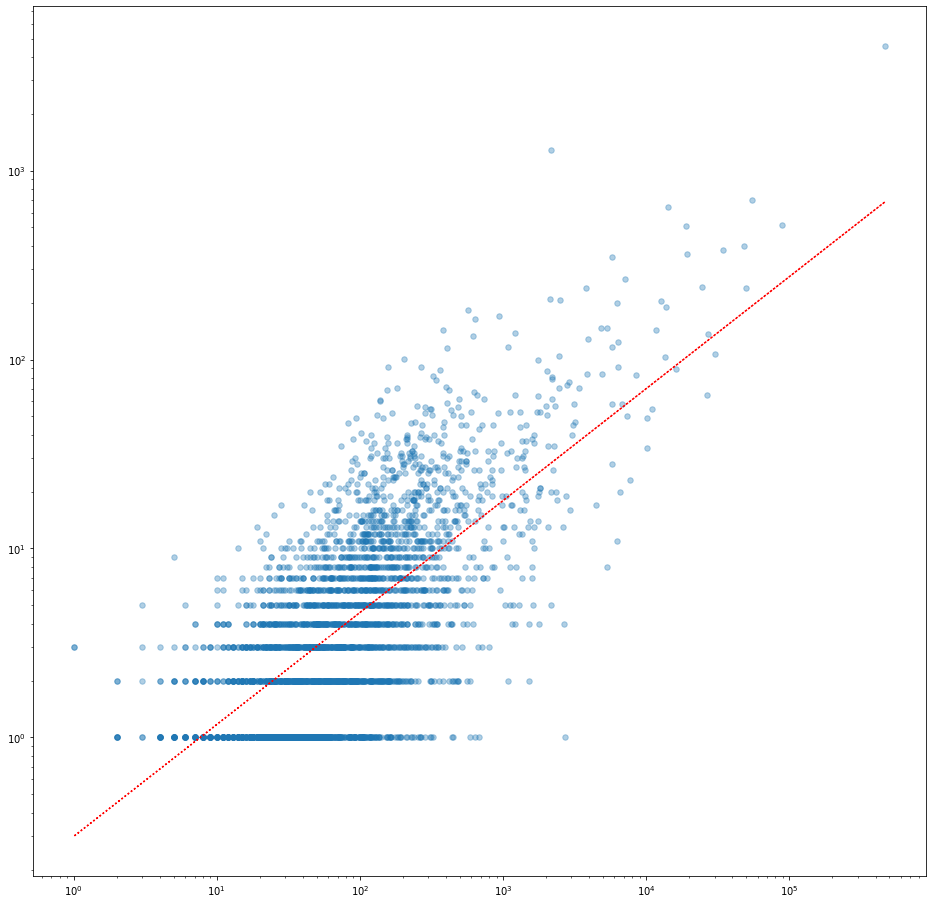

In [10]:
x = like_comments_sampled.numbr_likes[(like_comments_sampled.numbr_likes>0)&(like_comments_sampled.number_comments>0)]
y = like_comments_sampled.number_comments[(like_comments_sampled.numbr_likes>0)&(like_comments_sampled.number_comments>0)]

fig, ax = plt.subplots(figsize = (16,16))
ax.scatter(x,y,s=30,alpha=0.35)

m,q = np.polyfit(np.log10(x),np.log10(y),deg=1)
k = np.power(10,q)
Y = np.power(x,m)
ax.plot(x,k*Y,color='red',linestyle=':')

ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

From a data-visualization perspective, there's clearly a strong correlation between the number of likes and the number of comments. We had to scale to a log-log plot to make a readable plot, because other wise it would have been to much scattered. 

In particular to get the regression line in a log-log plot we had firstly to find the regression parameters between $log(x)$ and $log(y)$, because we knew that then we would have set the log scales to both axes. So we defined an exponential model in order to get a linear one after log-scaling. Given $m,q$ as the slope and the intercept of the linear regression line over $log(x)$ and $log(y)$, we defined this relation:

\begin{align}
y=10^q \cdot x^m
\end{align}

After log-scaling on both axes this equation becomes:

\begin{align}
y=10^q \cdot x^m \\
log_{10}(y) = log_{10}(10^q \cdot x^m) \\
log_{10}(y) = log_{10}(10^q) + log_{10}(x^m) \\
log_{10}(y) = q + m \cdot log_{10}(x)
\end{align}

which is a linear model between $log(x)$ and $log(y)$.

## Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

We can start from a data-visualization perspective, scatterplotting both likes and comments with respect to the timestamp of the post.

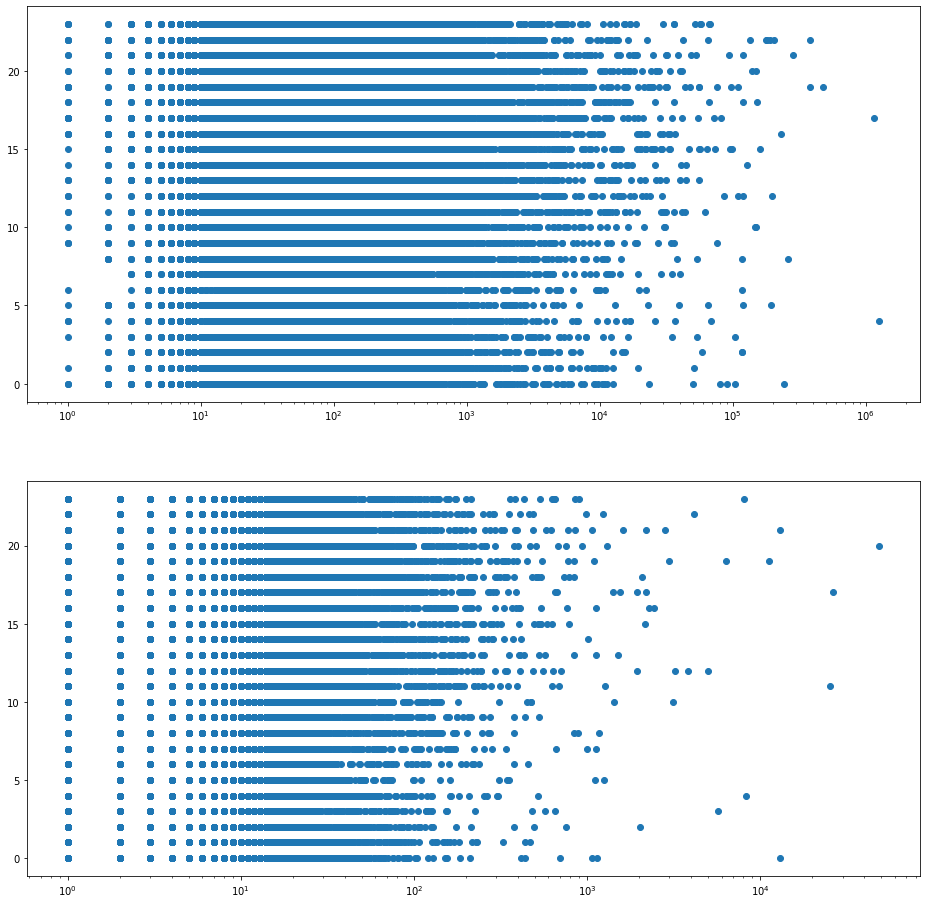

In [11]:
like_comments_sampled = like_comments.sample(100000)

x = like_comments_sampled.numbr_likes[(like_comments_sampled.numbr_likes>0)&(like_comments_sampled.number_comments>0)]
y = like_comments_sampled.number_comments[(like_comments_sampled.numbr_likes>0)&(like_comments_sampled.number_comments>0)]
z = like_comments_sampled.cts[(like_comments_sampled.numbr_likes>0)&(like_comments_sampled.number_comments>0)]

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,16))
ax1.scatter(x,z)
ax1.set_xscale('log')

ax2.scatter(y,z)
ax2.set_xscale('log')
               
plt.show()

These charts are not useful for interpreting this distribution, so we are going to manipulate this data. 
We are going to build a new dataframe where each of the series related to each of the timestamps is estimated with its median. 


In [24]:
estimated_likes = []
estimated_comments = []
timestamps = []
for i in range(0,24):
    mask = (like_comments.cts == i)
    timestamps.append(i)
    estimated_likes.append(like_comments.numbr_likes[mask].median())
    estimated_comments.append(like_comments.number_comments[mask].median())
    
estimated_like_comments = pd.DataFrame({
    'Timestamps': np.array(timestamps),
    'Estimated Likes':np.array(estimated_likes),
    'Estimated Comments':np.array(estimated_comments)
})

Now we are going to plot this new dataframe to better visualize if there is any relation between number of likes or number of comments and the time a user publishes. 

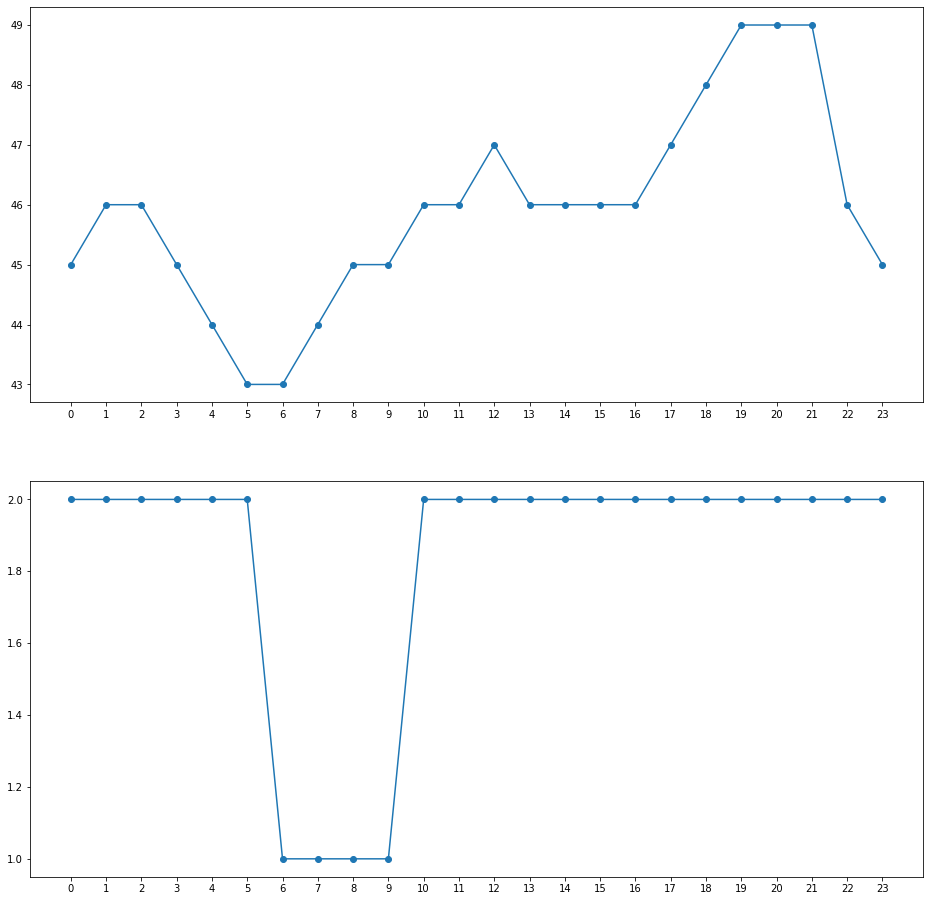

In [33]:
x = estimated_like_comments['Estimated Likes']
y = estimated_like_comments['Estimated Comments']
z = estimated_like_comments['Timestamps']


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,16))
ax1.plot(z,x,marker='o')
ax1.set_xticks(z)

ax2.plot(z,y,marker='o')
ax2.set_xticks(z)


plt.show()

We can assert that comments are almost evenly distributed through the whole day.
Instead there's clearly a trend in the number of likes during the day: it is particularly interesting to observe that the number of likes shows its peak in the moment of the day where users also post the most. 

## What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [17]:
profiles_followers = pd.read_csv('~/instagram_profiles.zip', delimiter='\t',usecols=['profile_id','followers'])

In [18]:
profiles_followers.followers.fillna(0,inplace=True)

In [19]:
profiles_followers.describe()

,profile_id,followers
count,4.477139e+06,4.509586e+06
mean,3.083302e+09,3.629111e+03
std,4.266575e+10,1.696849e+05
min,4.000000e+00,0.000000e+00
25%,2.735177e+08,9.000000e+00
50%,1.649248e+09,2.380000e+02
75%,5.514691e+09,7.290000e+02
max,9.001013e+13,2.854576e+08


Now we want to define a method to plot the eCDF. 
We are defining a script that approximate the CDF of the variable that defined the statistical population, treated as a sample from iid random variables.  

In [20]:
followers = np.sort(profiles_followers.followers)
distribution = np.arange(1,(len(followers) + 1)) / len(followers)

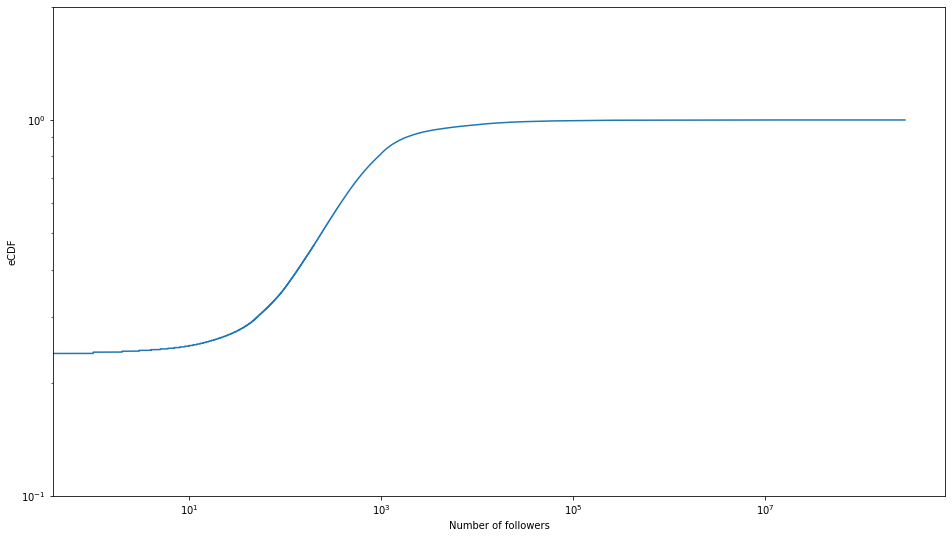

In [21]:
fig, ax = plt.subplots(figsize=(16,9))
ax = plt.gca()
ax.set_ylim([0.1, 2])
ax.plot(followers, distribution)
plt.xlabel('Number of followers')
plt.ylabel('eCDF')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

From a data-visualization perspective this chart confirms the consequences of the central limit theorem. Infact the empirical cumulative distribution function looks like the CDF of a gaussian variable. 

In [22]:
print('The mean of the number of followers is:          ', profiles_followers.followers.mean())
print('The median of the number of followers is:        ', profiles_followers.followers.median())
print('The mode of the number of followers is:'          , profiles_followers.followers.mode())
print('The first quartile of the number of followers is:', profiles_followers.followers.quantile(q=0.25))
print('The third quartile of the number of followers is:', profiles_followers.followers.quantile(q=0.75))
print('The variance of the number of followers is:      ', profiles_followers.followers.var())

The mean of the number of followers is:           3629.1106174713154
The median of the number of followers is:         238.0
The mode of the number of followers is: 0    0.0
dtype: float64
The first quartile of the number of followers is: 9.0
The third quartile of the number of followers is: 729.0
The variance of the number of followers is:       28792973151.50589


Looking briefly at this summaries disregards our previous hypotesis, because we know that in a gaussian distribution median and mean are the same values, because the gaussian distribution is centered in the mean. Moreover, the median is not centered between the first and the third quartile. This can result as a consequence of an unbalanced sample, due to choice we made over the data cleaning options, or maybe this effect is due to the massive presence of outliers. 

## What are histograms, bar plots, scatterplots and pie charts used for?

**Histograms** <br>
A histogram can be thought of as an estimator for the frequency distribution of a numeric variable. Outwardly, it looks like a bar plot, but instead of mechanically comparing data the histogram breaks it down into a certain amount of intervals and shows the frequency that falls into each interval. Thus, the values are split in bins (or buckets), each of whom is represented with a bar of a certain height. The number of bins is actually a very important parameter, because different values lead to a different representations; so it's crucial to try several rates to find the one that better depicts the pattern of data distribution over the given numeric spectrum. <br>
**Bar plots** <br>
A barplot (or bar chart or bar graph) is one of the most common types of graphics. It is used to show the relationship between a numeric variable and a categoric variable with rectangular bars with heights or lengths proportional to the values that they represent. In fact, a bar chart can be plotted both horizontally and vertically, case in which it is called a "column chart". In any case, the size of the bar represents the numeric value of the categoric variable. Because of these characteristics, bar plots are the most immediate charts to think of when having to display comparison among discrete categories. One axis shows the specific categories being compared, and the other a measured value for that category. In addition, it's possible to plot moltiple bars clustered in groups to represent the measure of more than one category. There are a few variations to create slighlty different-looking figures preserving the barplot accuracy, like for example lollipop plots: they are substancially a bar plot, but the bars are replaced with a stem and a dot. <br>
**Scatterplots** <br>
A scatter plot (or scatter chart or scatter graph) is a graphic that displays values for typically two variables of the same dataset, placing them in a Cartesian coordinates system. So, the data appears as a collection of points where the value of each variable determines the position of the point along the related axis. Each point represent an individual of the population we're examining through the information available in the dataset. A scatterplot's primary purpose is to observe the relationship between two variables: moreover, an important advantage of a scatterplot is that not only it allows to compare the numeric values of two variables, but it also displays the pattern between them. And from this pattern we can infer correlational relationships among variables. If there's correlation, given a particular horizontal value, we're able to tell what a good prediction would be for the vertical value. In order to be able to do so, we can divide data points into different groups based on how much aggregated a set of points appear. If there's a proportional increment in the point cloud displayed in the graph, the variables are correlated. In addition, we can look for any unexpected gaps in the data and/or any outlier points. Therefore, a scatterplot it's a quite meaningful and powerful type of chart. Anyway, it's important to underline that not always changes in one variable are responsible for changes in the other, as it may be implicated be some third variable contribution. <br>
**Pie charts** <br>
A pie chart (or a circle chart) is a circular statistical chart. Each variable is represented by a "slice of the pie" corresponding to its numerical proportion to the total. Consequently, in a pie chart, the arc of length of each slice, its angle and its area, are all proportional to the quantity it represents. This kind of graph has been named for its similarity to a pie that has been sliced, and there are a few variations on the way it can be displayed (for example as a donut chart). Although pie charts are widely used in the business world and the mass media, they're actually deprecated beacuse of the difficulty of reading angles and accurately compare the different sections. Whenever possible, pie charts should be replaced by other plots such as bar plots, box plots, dot plots, etc. On the other hand, a pie chart offers some advantages: it's best to use it when dealing with a few distinctive parts, as it overall provides a "user-friendly" visualization, and when data analysis doesn’t need to include time, as the pie chart lacks a dimension to represent it.

## What insights can you extract from a Box Plot?

A box plot (also knows as box and whisker plot) exploits boxes and lines to illustrate the distributions of numeric data values, especially when we're interested in comparing them between groups of variables. The construction of a box plot is based on quartiles, i.e. the values that divide the dataset into three equal fourths. The box limits demarcate the range of the central 50% of the data, whereas the central line identifies the median value, so that the ends of the box and its center line actually mark the locations of quartiles. Lines then extend from each box to reach the range of the remaining data, with dots placed past the line edges to indicate outliers. The distance between the third and first quartile is known as the interquartile range (IQR) and determines how long the whiskers extending from the box are. Box plots provide high-level information at a glance and are compact in their description of data, thanks to the the fact that they're based on the five-number summary: they comprise the minimum, the maximum, the sample median, and the first and third quartiles of the dataset. They're widely used in descriptive statistics as they're a standardized method to provide global information about data's symmetry, skew, variance and outliers. Outliers that differ significantly from the distribution of the dataset are shown as individual points beyond the whiskers limit, so it's immediate to notice them. It is also easy to see where the main bulk and skew of the data are. If a distribution is skewed, the median will not be in the middle of the box but will move to one or another side. We can also find imbalance in the length of the wiskers, that are one shorter with no outliers and the other with a long tail full of outliers.

<div>
    <center><img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots.jpg", width='750'/></center>
</div>


_______________

____________

# Algorithmic question #1

### *1. What is the output of the algorithm?*


This algorithm is defined in two blocks. One is a subroutine $f_1$ that for an input array gives back each element of the array till the $end$ index. The second block $f_2$ is defined recursively: this recursive expression shifts forward the $start$ index until the condition $start = end$ is True and the subroutine $f_1$ is called to output the modified array, while in the inner loops temporary variables store the element pointed by $start$ element to do a switch.
Basically, ignoring the partial outputs of the algorithm, this script takes the last element of the sequence, brings it to the first position, and then shift one position ahead the remaining sequence. 

The problem in this algorithm is that every second part of every loop and every first part of the following loop does exactly the same tasks, so it is not efficient at all. Actually, it has many redundancies, also in the stop condition verification and the initialization of the loop. It is not a well designed algorithm: the switch, the core of the algorithm, actually only happens after the recursive calls. 

### *2. Asymptotical running time*

We have the $f_1$ subroutine that is executed only one time in a running time $n$. We then have a for loop where there's the recursive call. This implies that every $for$ loop nests another for loop on every recursive calls, resulting in $n$ nested for loops: each $i_{th}$ iteration goes from $i$ to $n$. So this part of the algorithm runs in $6\cdot\prod_{i=0}^{n} (n-1)$. So asymptotically $T(n) = \theta(n^{n})$.

### *3. Optimizing the algorithm*

We can write a linear algorithm that points straight to the final output of the whole procedure. 

_____________

# Algorithmic question #2

## Some introductive notes

We want to analyze two basic istances of the problem: maximizing the product of the lengths after one single cut, and maximizing the product of the lengths after two following cuts. It can be shown thath both problem are concave non linear maximization problems with integer constraints, so we are going to get only specific solutions without branching&bounding.

##### *Maximize the product of the lengths given by a single cut*

Given $N$ as an integer and supposing we cut $k$ element from it, the product between the length of the two sections is $k(N-k)$. 
The problem is 
\begin{align}
\max\limits_{k = 1,2,...,N-1}\ \ k(N-k)
\end{align}

Expanding the expression we have
\begin{align}
\max\limits_{{k = 1,2,...,N-1}}\ \ k(N-k) =\max\limits_{{k = 1,2,...,N-1}}\ \ kN-k^2
\end{align}

It's easy to prove that the target function $F(k,N) = kN-k^2 $ is a concave one in his domain: infact
\begin{align}
\frac{\partial ^2 F}{\partial k^2} = -2
\end{align}

Since $F$ is a concave function and we are dealing with a maximization problem, first order conditions of optimality are necessary and sufficient conditions. 

So 
\begin{align}
\frac{\partial F}{\partial k}  = N - 2k = 0
\end{align}

Gives us the optimal value for $k$, 
\begin{align}
k^*=\frac{N}{2}
\end{align}

and sets an obvious constraint over $N$, which should be $N>2$. It is also only true for even values of $N$.

This approach doesn't seem to work with even or not even number without further assumptions. In other words, maximizing on the first cut is not enough to come up with a global solution. 
- Given for example $N=8$, applying this first criterion, we choose the cut $(4,4)$ that maxizime the product on ther first cut. Infact we have the cuts and associated products $(1,7):7, (2,6):12, (3,5):15, (4,4):16$. The cut $(3,5)$, with a furter cut, gives $(3,3,2)$, and the product is $18$ which is greate than every possible furter cut on $(4,4)$.
- Given for example $N=9$, we see that even if the first cut $(4,5)$ gives $20$ as a partial output it doesn't lead to the maximum, dispite it is greater than the partial output given by the cut $(3,6)$ that is $18$. In fact the cut $(3,6)$ than gives us the cut $(3,3,3)$ which outputs $27$, against the first that leads to $(2,2,2,3)$, which outputs $24$. So we can extend our analysis to a more dynamic approach. 

##### *Maximize the product of the lengths given by two folllowing cuts*

Given $N$ as an integer, let's suppose we remove $k$ elements from it. Then, we remove $j$ elements from the remaining $N-k$, so that we are left with $N-k-j$ elements. The problem becomes
\begin{align}
\begin{cases}
\max\limits_{{k,j}}\ \ kj(N-k-j)\\
1 \leq k < N \\
1 \leq j < N - k
\end{cases}
\end{align}

We can prove concavity of the target function $F(N,k,j)$ with the determinant of the Hessian. 
\begin{equation}
\begin{bmatrix}
\frac{\partial ^2 F}{\partial k^2} & \frac{\partial ^2 F}{\partial k \partial j}\\
\frac{\partial ^2 F}{\partial k \partial j} & \frac{\partial ^2 F}{\partial j^2}\\
\end{bmatrix}
=
\begin{bmatrix}
-2j & N-2k-2j\\
N-2k-2j & -2k
\end{bmatrix}
\end{equation}

We can show that the determinant of the Hessian is definite negative since $H(1,1) < 0$ and its determinant is positive for all values of $N$, $j$ and $k$. 

Now we can find the optimal solution by using first order conditions, since we are dealing with maximizing a concave function. 
\begin{cases}
    \frac{\partial F}{\partial k}  = jN - 2kj - j^2 = 0\\
    \frac{\partial F}{\partial j}  = kN - 2kj - k^2 = 0
\end{cases}

\begin{cases}
j^2+(2k-N)j=0\\
k^2+(2j-N)k=0
\end{cases}

\begin{cases}
j(j+2k-N)=0\\
k(k+2j-N)=0
\end{cases}

\begin{cases}
j=N-2k\\
k+2N-4k-N=0
\end{cases}

So we are given the optimal values $k^*=\frac{N}{3}$ and $j^*=\frac{N}{3}$. This is basically true for multiples of 3, but we can merge this solution with the initial one to find a path that leads us to a recursive solution and to a linear heuristic solution for $N$ generic. Infact the cuts that make block of length $2$ or $3$ are the ones that give us the maximum product between lengths. So we are going to work on algorithms assuming that $N>4$, because as the basic cases of the recursion we'll exclude the cases $N=2,N=3,N=4$.
- $N=2$ : the only mandatory cut is $(1,1)$, that reduces the product of lengths in a more complex case, so we don't go any further;
- $N=3$ : the only mandatory cut is $(2,1)$ and we don't go any further, because cutting again will reduce the product of lengths, but in a more complex case where we find $(..,...,...,3)$ as a result of successive cuts we don't cut the ribbon of length 3 anymore;
- $N=4$ : the best mandatory cut is $(2,2)$ and we don't go any further for the same reasons; in a more complex case where we find $(...,...,...,4)$ as a result of successive cuts it is indifferent wheter we cut again or not.

### *1. Recursive version of the algorithm*

In [1]:
def ribbonCut(n:int) -> int:
    if n <= 4:
        return n
    else:
        return max([i*ribbonCut(n-i) for i in range(1,n)])

We are going to look at the results for the first 25 number and then make some comments about this algorithm. 

In [2]:
import pandas as pd
import numpy as np

ribbons = [i for i in range(5,26)]
ribbons_solutions = np.array([ribbonCut(i) for i in ribbons])

RecursiveResults = pd.DataFrame({
    'Ribbons':np.array(ribbons),
    'Max product of sublengths':ribbons_solutions
})

RecursiveResults

,Ribbons,Max product of sublengths
0,5,6
1,6,9
2,7,12
3,8,18
4,9,27
5,10,36
6,11,54
7,12,81
8,13,108
9,14,162


This algorithm is defined over a recursive expression. As we said before, the basic cases of the recursion are those over which we decrease the product of the sub-lengths if we cut. We are assuming we are dealing with $N>4$ inputs, because as we said the mandatory cut give us this situation:

In [3]:
BasicInstances = pd.DataFrame({
    'Basic instances':[2,3,4],
    'Mandatory cut and related product':[((1,1),1),((1,2),2),((2,2),4)]})
BasicInstances

,Basic instances,Mandatory cut and related product
0,2,"((1, 1), 1)"
1,3,"((1, 2), 2)"
2,4,"((2, 2), 4)"


If these basic instances appears as a partial output of the process we keep them uncutted. 

The algorithm basically exploits the idea given by the second model we analyzed at the beginning. It is not enough to maximize the product over one cut, but we need to go deeper because the global maximum could be in a starting cut that doesn't maximize. 

The recursive expression 
\begin{align}
max \{ i\cdot ribbonCut(n-i) _{for\:i \in [1,n)_N}\}
\end{align}

didn't need to be written in this way, although it seems more complete:
\begin{align}
max\{ribbonCut(i) \cdot ribbonCut(n-i) _{for\:i \in [1,n)_N}\}
\end{align}

because the term $ribbonCut(n-i)$ scans through all the values of $(n-i)$ for $i=1,...,n$, so it is enough to scan through also all values of $i$: when $i\geq \frac {N}{2}$, $n-1$ is scanning values of $i < \frac {N}{2}$.

This algorithm builds every possible cut made up of basic instances in the top-down phase, then come up with the maximum product between the given length in the bottom-up phase. It computes every cut of every sub-ribbon on every recursive call, and then when it meets the stop condition retraces all the partial outputs and finds the maximum. 

The problem of this algorithm is the reason why it isn't efficient. Infact it computes many times the same values: we'll solve this with dynamic programming implementation.

### *2. Evaluation of the running time: purely recursive case*

Now we want to evaluate the running time of this implementation. Following the recursive expression, we can come up with this expression for $T(n)$, because to find the maximum value in the worst case we need to compute all of the other values. 

\begin{align}
T(n) = k + \sum_{i=1}^{n-1} T(n-i)\ 
\end{align}

We can build a chain of $n$ inequalities, because the running-time function is growing monotone with respect to $n$. 

- $T(n) \geq (n-1)\cdot(T(n-1)+k)$ because we are upper-bounding each $T(n-i)_{i=1,...,n-1}$ term that appears in $\sum_{i=1}^{n-1} T(n-i)$ with $T(n-1)$

- $T(n-1) \geq (n-2)\cdot(T(n-2)+k)$ because we are upper-bounding each $T(n-i)_{i=2,...,n-1}$ term that appears in $\sum_{i=2}^{n-1} T(n-i)$ with $T(n-2)$

- ...

We can find a resuming inequality by combining this considerations:

\begin{align}
T(n) \geq T(1)\cdot\prod_{i=1}^{n-1}(n-i)
\end{align}




So we can finally assert that $T(n) = \theta(n^{n-1})$.

### *3. Optimization with dynamic programming techniques and running-time evaluation*

Now we are going to optimize this algorithm by using dynamic programming. This provides an implementation that avoids counting repeatedly the same values. 

We need a data structure to store values we compute at each iteration, until we reach the stop condition. 

So we build a table where rows are numerated from $n-1$ to $1$, and columns are numerated from $1$ to $n-1$. We'll find on the main diagonal the product between the row-label and the column-label: in other words, this is the product on the first cut. Then we want to go deeper, finding for every resulting lengths its possible cuts.
The resulting matrix is going to be a lower triangular matrix: we'll fill it iterating the basic idea through the diagonals of the square minor matrices. This we'll give us the product of the lengths given by each subcut on the related supercut.

Then we'll use the Bellman's equation to update bottom-up the values on this diagonals, in order to maximize every level of the configurations until in the main diagonal we'll find the global solution on its maximum. 

In [15]:
import numpy as np

def dynamicRibbon(n:int) -> int:
    if n <= 4:
        return n
    dp = np.array([[0 for i in range(1,n)] for i in range (1,n)])            #We initialize a table that will result in a triangular matrix
    for y in range(1,n):                                                     #We fill the diagonal with all the possible first cuts
        dp[y-1][y-1] = y*(n-y)
    
    '''
    Then I define a procedure to fill and update the values on the squared minors
    diagonals and I want the method to output the maximum value on the main diagonal.
     
    This update procedure is based on finding the cut that maximize the product of the lengths
    given by each value that gets cutted.
    '''
                                                                             #TOPDOWN
    for k in range(1,n-1):                                                   #This procedure fills the triangular matrix
        for j in range(1, n-k):                                              #We need this to define a proper state table
            dp[j+k-1][j-1] = j*(n-j-k)                                       #to be updated
            
    print(dp)                                                                #To show the state table before updates
    
                                                                             #BOTTOMUP
    for i in range(n-6,-1,-1):                                               #I don't need to update the basic istances
        for l in range(0,1+(n-1-i)//2):                                      #Each diagonal is symmetric, so I just go through half of it
            square_minor_dimension = s = n-2-i-l
            dp[i+l,l] = max(dp[i+l,l],                                       #BELLMAN'S EQUATION
                            (l+1)*max([dp[i+l+1+m,m]                         #(l+1) links this index to the number it actually represents, the other length given by the super-cut
                                       for m in range(0, s)]))               #This m-index goes through the columns of the diagonal 
                                                                             #of interest, which start one row down the pointer (i,l)
                 
    print(dp)                                                                #To show the state table after updates
    
    return np.max(np.diagonal(dp))                                           #ACHTUNG The max over the main diagonal is also the max over
                                                                             #the whole table

It's easy to compute the running time in this case, because we basically have to count the number of operations due to the loops. We need $\frac{(n-1)^2}{2}$ operations to fill the lower triangular matrix, and in the worst case we need $\sum_{x=5}^{n} (n-x)^2$ to make all the comparisons and make the update. In fact every 'diagonal' (except for the ones related to basic instances) forces to check back all the underlying values, and we know that $\sum_{z=1}^{n} z^2 \sim n^3$. Finally, we need $\frac{(n-1)^2}{2}$ operations to extract the maximum from the diagonal of the matrix. 

Due to these considerations, this specific implementation has a polynomial running time, and in particular $T(n) = \theta(n^3)$: there's for sure a better implementation that optimize the update procedure and the memory usage, but we make a great improvement over the first implementation. 

### *4. Comparing the two algorithms*

Now we are going to build two datasets to show the different running times of the two algorithms. We assume now that for $N<4$ we won't cut the ribbon. 

In [ ]:
import pandas as pd
import numpy as np
import timeit

recursive_runtimes = []
for num in range(2,26):
    start = timeit.default_timer()
    ribbonCut(num)
    stop = timeit.default_timer()
    recursive_runtimes.append(stop-start)

dynamic_runtimes = []
for num in range(2,26):
    start = timeit.default_timer()
    dynamicRibbon(num)
    stop = timeit.default_timer()
    dynamic_runtimes.append(stop-start)

ribbons = [i for i in range(2,26)]
recursive_solutions = np.array([ribbonCut(i) for i in ribbons])
dynamic_solutions = np.array([dynamicRibbon(i) for i in ribbons])

Results = pd.DataFrame({
    'Ribbons':np.array(ribbons),
    'Solutions':recursive_solutions,
    'Recursive Runtimes':np.array(recursive_runtimes),
    'Dynamic Runtimes':np.array(dynamic_runtimes)
})


In [6]:
Results

,Ribbons,Recursive Solutions,Recursive Runtimes,Dynamic Runtimes
0,2,2,2.044000e-06,2.003000e-06
1,3,3,4.810000e-07,4.889999e-07
2,4,4,3.690001e-07,4.380000e-07
3,5,6,4.306000e-06,9.795500e-05
4,6,9,4.252000e-06,4.160800e-05
5,7,12,6.051000e-06,4.967100e-05
6,8,18,1.053300e-05,6.027200e-05
7,9,27,5.803670e-04,7.654900e-05
8,10,36,4.128600e-05,9.603500e-05
9,11,54,6.436040e-04,1.154140e-04


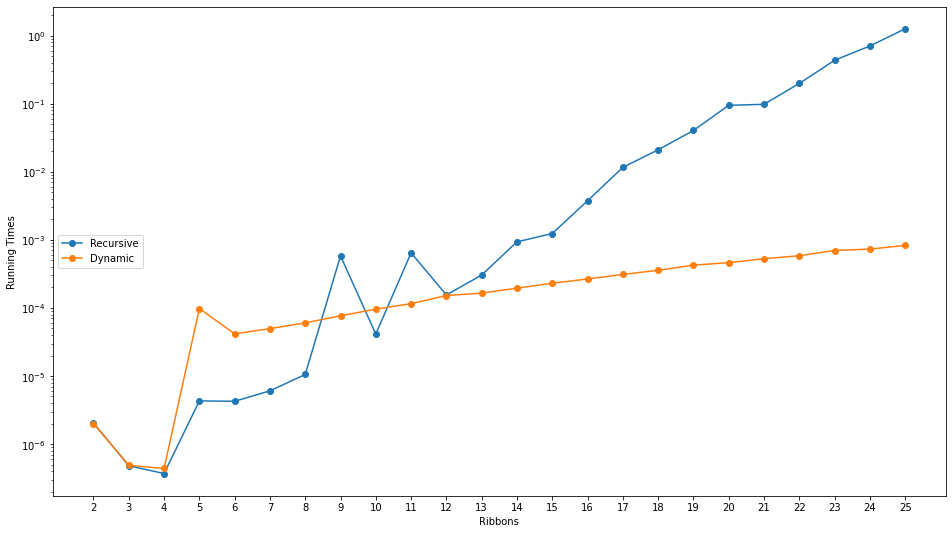

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(Results.Ribbons, Results['Recursive Runtimes'],label='Recursive', marker='o')
ax.plot(Results.Ribbons, Results['Dynamic Runtimes'], label='Dynamic', marker='o')
ax.set_yscale("log")
ax.legend(loc='center left')
plt.xlabel('Ribbons')
plt.ylabel('Running Times')
plt.xticks(Results.Ribbons)
plt.show()

As we can see from the dynamic implementation is effectively more efficient for larger istances. It is less efficient for smaller ones, but we are in not appreciable order of magnitude. Instead the recursive implementation exceed the order of seconds for $N>25$, with a lineare trend in a *log-y-scale*, while the dynamic programming implementation is closer to a costant line, as expected from our considerations. 

### *5. Is there any better algorithm?*

What we have seen in this problem is that in both the two provided implementation the core of the solution is to decompose the problem to it's basic istances. If we confirm our basic cases, we can provide a linear recursive algorithm, which is based on the key idea that every $n_i>4$ (where $n_i$ is a part of the ribbon obtained from a certain $i_{th}$ cut on the original one) should be cutted in parts of length 2 or 3. This can be seen with some small instance, and confirmed with the correct algorithms we implemented before.  

In [8]:
def bestRibbon(n:int) -> int:
    if n <= 4:
        return n
    else:
        return 3*bestRibbon(n-3)

For basic instances:

-$5$ can be decomposed in $(3,2)$, and the product is $6$;

-$6$ can be decomposed in $(3,3)$, and the product is $9$;

-$7$ can be decomposed in $(3,4)$, and the product is $12$;

-$8$ can be decomposed in $(3,3,2)$, and the product is $18$;

-$9$ can be decomposed in $(3,3,3)$, and the product is $27$;

-$10$ can be decomposed in $(3,3,4)$, and the product is $36$;

-...and so on.

In [9]:
best_runtimes = []
for num in range(2,26):
    start = timeit.default_timer()
    bestRibbon(num)
    stop = timeit.default_timer()
    best_runtimes.append(stop-start)

Now we're going to add these results to the dataframe we built previously.

In [10]:
Results['Best Runtimes'] = best_runtimes
Results['Best solutions'] = np.array([bestRibbon(i) for i in ribbons])

In [11]:
Results

,Ribbons,Recursive Solutions,Recursive Runtimes,Dynamic Runtimes,Best Runtimes,Best solutions
0,2,2,2.044000e-06,2.003000e-06,2.686000e-06,2
1,3,3,4.810000e-07,4.889999e-07,3.200000e-07,3
2,4,4,3.690001e-07,4.380000e-07,4.010000e-07,4
3,5,6,4.306000e-06,9.795500e-05,1.100000e-06,6
4,6,9,4.252000e-06,4.160800e-05,4.740000e-07,9
5,7,12,6.051000e-06,4.967100e-05,4.220000e-07,12
6,8,18,1.053300e-05,6.027200e-05,9.650000e-07,18
7,9,27,5.803670e-04,7.654900e-05,5.890000e-07,27
8,10,36,4.128600e-05,9.603500e-05,5.149999e-07,36
9,11,54,6.436040e-04,1.154140e-04,9.320000e-07,54


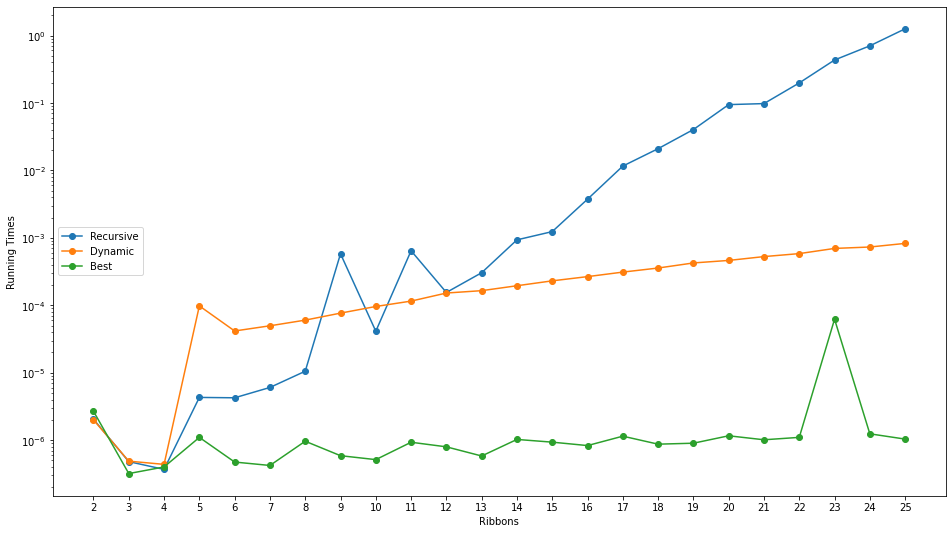

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(Results.Ribbons, Results['Recursive Runtimes'],label='Recursive', marker='o')
ax.plot(Results.Ribbons, Results['Dynamic Runtimes'], label='Dynamic', marker='o')
ax.plot(Results.Ribbons, Results['Best Runtimes'], label='Best', marker='o')
ax.set_yscale("log")
ax.legend(loc='center left')
plt.xlabel('Ribbons')
plt.ylabel('Running Times')
plt.xticks(Results.Ribbons)
plt.show()